# Stagionalità di una serie (Metodo 1)

Partiamo da un titolo azionario campionato su periodicità daily:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

instrument = pd.read_csv('GE_Daily.txt', 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['DayOfWeek'] = instrument.index.dayofweek
instrument['Week'] = instrument.index.week

instrument.head(10)

Il file contiene 4682 record


,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,DayOfWeek,Week
Date_Time,,,,,,,,,,
2000-01-03 16:00:00,51.00,51.23,49.73,50.00,50.49,-1.96,NaN,3,0,1
2000-01-04 16:00:00,49.08,49.33,48.02,48.06,48.62,-2.08,-3.88,4,1,1
2000-01-05 16:00:00,47.92,49.00,47.52,47.92,48.09,0.00,-0.29,5,2,1
2000-01-06 16:00:00,47.71,48.98,47.54,48.56,48.20,1.78,1.34,6,3,1
2000-01-07 16:00:00,49.33,50.62,49.00,50.44,49.85,2.25,3.87,7,4,1
2000-01-10 16:00:00,50.90,51.35,50.37,50.42,50.76,-0.94,-0.04,10,0,2
2000-01-11 16:00:00,50.33,50.90,50.21,50.50,50.48,0.34,0.16,11,1,2
2000-01-12 16:00:00,50.35,51.08,50.19,50.67,50.57,0.64,0.34,12,2,2
2000-01-13 16:00:00,51.04,51.65,51.00,51.25,51.24,0.41,1.14,13,3,2


Filtriamo tutti i lunedì (DayOfWeek==0) della prima settimana dell'anno sull'intera serie di dati (si considera prima settimana dell'anno quella che abbia almeno uno dei sette giorni nell'anno successivo, quindi avremo virtualmente 53 settimane per anno):

In [2]:
instrument[(instrument['DayOfWeek']==0) & (instrument['Week']==1)]

,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,DayOfWeek,Week
Date_Time,,,,,,,,,,
2000-01-03 16:00:00,51.00,51.23,49.73,50.00,50.49,-1.96,NaN,3,0,1
2001-12-31 16:00:00,40.55,40.80,40.03,40.08,40.36,-1.16,-1.60,31,0,1
2002-12-30 16:00:00,24.53,24.75,24.20,24.50,24.50,-0.12,-0.81,30,0,1
2003-12-29 16:00:00,30.70,30.83,30.52,30.83,30.72,0.42,0.36,29,0,1
2005-01-03 16:00:00,36.75,36.89,36.44,36.59,36.67,-0.44,0.25,3,0,1
2007-12-31 16:00:00,37.30,37.30,36.96,37.07,37.16,-0.62,-0.72,31,0,1
2008-12-29 16:00:00,15.95,16.00,15.35,15.66,15.74,-1.82,-1.94,29,0,1
2010-01-04 16:00:00,15.22,15.64,15.15,15.45,15.36,1.51,2.12,4,0,1
2011-01-03 16:00:00,18.49,18.50,18.22,18.28,18.37,-1.14,-0.05,3,0,1


In [3]:
round(instrument[(instrument['DayOfWeek']==0) & (instrument['Week']==1)]['DeltaClosePerc'].mean(),2)

-0.1

In [4]:
round(instrument[(instrument['DayOfWeek']==1) & (instrument['Week']==1)]['DeltaClosePerc'].mean(),2)

-0.31

In [5]:
round(instrument[(instrument['DayOfWeek']==2) & (instrument['Week']==1)]['DeltaClosePerc'].mean(),2)

0.91

In [6]:
round(instrument[(instrument['DayOfWeek']==3) & (instrument['Week']==1)]['DeltaClosePerc'].mean(),2)

0.3

In [7]:
round(instrument[(instrument['DayOfWeek']==4) & (instrument['Week']==1)]['DeltaClosePerc'].mean(),2)

0.33

In [8]:
round(instrument[(instrument['DayOfWeek']==5) & (instrument['Week']==1)]['DeltaClosePerc'].mean(),2)

nan

In [9]:
round(instrument[(instrument['DayOfWeek']==6) & (instrument['Week']==1)]['DeltaClosePerc'].mean(),2)

nan

Ripetiamo l'operazione in modo iterativo popolando l'array "seasonality", sempre per la prima settimana dell'anno:

In [10]:
seasonality = []
daysofweek = []

for day in range(0,7):
    daysofweek.append(day)

print(daysofweek)

for day in daysofweek:
    #print(dayofweek)
    seasonality.append(round(instrument[(instrument['DayOfWeek']==day) & 
                                        (instrument['Week']==1)]['DeltaClosePerc'].mean(),2))
    
print(len(seasonality))
print(seasonality)

[0, 1, 2, 3, 4, 5, 6]
7
[-0.1, -0.31, 0.91, 0.3, 0.33, nan, nan]


Ripetiamo il tutto per le 53 settimane che virtualmente possono comporre un anno (in questa nuova convenzione):

In [11]:
seasonality = []
daysofweek = []
weeks = []

for day in range(0,7):
    daysofweek.append(day)

for week in range(1,53):
    weeks.append(week)

print(daysofweek)
print(weeks)
print("")

for week in weeks:
    for day in daysofweek:
        seasonality.append(round(instrument[(instrument['DayOfWeek']==day) & 
                                            (instrument['Week']==week)]['DeltaClosePerc'].mean(),2))
    
print(len(seasonality))
#print(seasonality)
#print("")

seasonality = pd.DataFrame(seasonality)
seasonality.columns = ['Daily_Seasonality']
seasonality['Equity'] = seasonality['Daily_Seasonality'].cumsum()
seasonality.head(10)

[0, 1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]

364


,Daily_Seasonality,Equity
0,-0.10,-0.10
1,-0.31,-0.41
2,0.91,0.50
3,0.30,0.80
4,0.33,1.13
5,NaN,NaN
6,NaN,NaN
7,-0.43,0.70
8,-0.45,0.25
9,-0.03,0.22


Grafichiamo con Matplotlib:

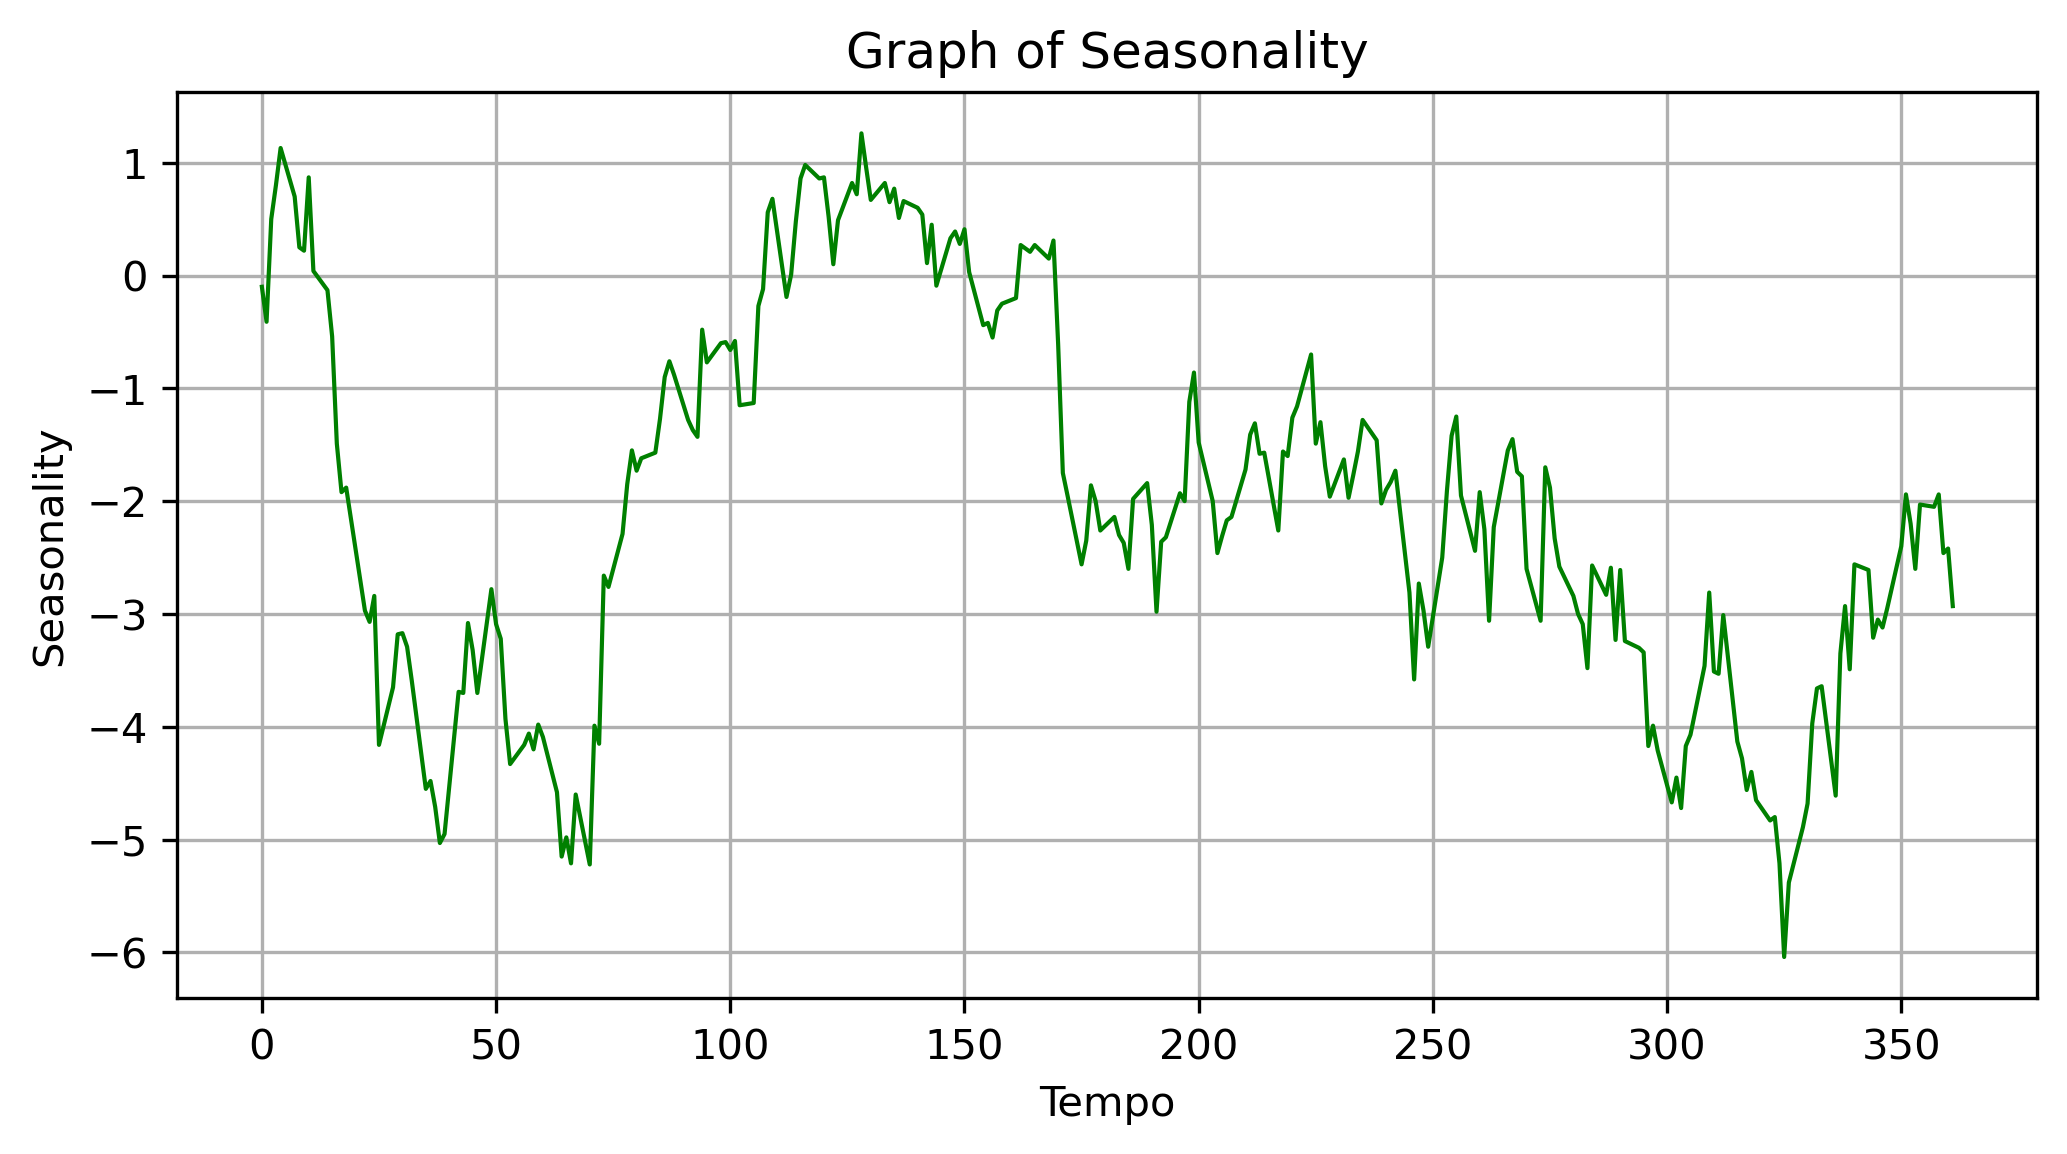

In [12]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=300)

ap = seasonality['Equity'].dropna()

plt.plot(ap, color='green', linewidth=1)

plt.xlabel("Tempo")
plt.ylabel("Seasonality")
plt.title('Graph of Seasonality')
plt.grid(True)
plt.show()

Grafichiamo con Plotly&Cufflinks:

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # necessaria versione >= 1.9.0

import cufflinks as cf

# Per utilizzo con Notebooks
init_notebook_mode(connected=True)

# Per utilizzo offline
cf.go_offline()

seasonality['Equity'].dropna().iplot(kind='line',bins=364, color='green', width=2)

4.7.1


# Stagionalità di una serie (Metodo 2)

Proviamo adesso a calcolare la stagionalità non rispetto alla settimana dell'anno (affetta dal problema della settimana zero), ma sul giorno del mese (che tuttavia può variare di anno in anno come giorno della settimana).

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

instrument = pd.read_csv('GE_Daily.txt', 
                         usecols=['Date','Time','Open','High','Low','Close'], 
                         parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument.head(10)

Il file contiene 4682 record


,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,Month
Date_Time,,,,,,,,,
2000-01-03 16:00:00,51.00,51.23,49.73,50.00,50.49,-1.96,NaN,3,1
2000-01-04 16:00:00,49.08,49.33,48.02,48.06,48.62,-2.08,-3.88,4,1
2000-01-05 16:00:00,47.92,49.00,47.52,47.92,48.09,0.00,-0.29,5,1
2000-01-06 16:00:00,47.71,48.98,47.54,48.56,48.20,1.78,1.34,6,1
2000-01-07 16:00:00,49.33,50.62,49.00,50.44,49.85,2.25,3.87,7,1
2000-01-10 16:00:00,50.90,51.35,50.37,50.42,50.76,-0.94,-0.04,10,1
2000-01-11 16:00:00,50.33,50.90,50.21,50.50,50.48,0.34,0.16,11,1
2000-01-12 16:00:00,50.35,51.08,50.19,50.67,50.57,0.64,0.34,12,1
2000-01-13 16:00:00,51.04,51.65,51.00,51.25,51.24,0.41,1.14,13,1


In [15]:
instrument[(instrument['Month']==1) & (instrument['DayOfMonth']==2)]

,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,Month
Date_Time,,,,,,,,,
2001-01-02 16:00:00,46.75,47.00,42.63,43.75,45.03,-6.42,-8.74,2,1
2002-01-02 16:00:00,40.30,40.95,40.05,40.95,40.56,1.61,2.17,2,1
2003-01-02 16:00:00,24.65,25.60,24.55,25.48,25.07,3.37,4.64,2,1
2004-01-02 16:00:00,31.00,31.58,30.92,31.12,31.16,0.39,0.45,2,1
2008-01-02 16:00:00,37.10,37.45,36.55,36.76,36.97,-0.92,-0.84,2,1
2009-01-02 16:00:00,16.51,17.07,16.27,17.07,16.73,3.39,5.37,2,1
2013-01-02 16:00:00,21.54,21.54,21.20,21.34,21.40,-0.93,1.67,2,1
2014-01-02 16:00:00,27.86,27.94,27.41,27.50,27.68,-1.29,-1.89,2,1
2015-01-02 16:00:00,25.34,25.46,24.87,25.06,25.18,-1.10,-0.83,2,1


In [16]:
instrument[(instrument['Month']==2) & (instrument['DayOfMonth']==29)]

,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,Month
Date_Time,,,,,,,,,
2000-02-29 16:00:00,43.54,44.67,43.37,44.12,43.92,1.33,2.25,29,2
2008-02-29 16:00:00,33.74,33.75,33.09,33.14,33.43,-1.78,-2.10,29,2
2012-02-29 16:00:00,19.18,19.25,19.01,19.05,19.12,-0.68,-0.57,29,2
2016-02-29 16:00:00,29.44,29.55,29.12,29.14,29.31,-1.02,-0.88,29,2


In [17]:
seasonality = []
daysofmonth31 = []
daysofmonth30 = []
daysofmonth29 = []
months = []

for month in range(1,13):
    months.append(month)

for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)

print(months)
print(daysofmonth31)
print(daysofmonth30)
print(daysofmonth29)
print("")

for month in months:
    if month==2:
        for day in daysofmonth29:
            seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
    if month==11 or month==4 or month==6 or month==9:
        for day in daysofmonth30:
            seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        for day in daysofmonth31:
            seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
    
print(len(seasonality))
#print(seasonality)
#print("")

seasonality = pd.DataFrame(seasonality)
seasonality.columns = ['Daily_Seasonality']
seasonality['Equity'] = seasonality['Daily_Seasonality'].cumsum()
seasonality.tail(10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

366


,Daily_Seasonality,Equity
356,0.07,-3.53
357,0.37,-3.16
358,-0.37,-3.53
359,NaN,NaN
360,-0.16,-3.69
361,-0.54,-4.23
362,-0.19,-4.42
363,-0.02,-4.44
364,-0.31,-4.75
365,0.13,-4.62


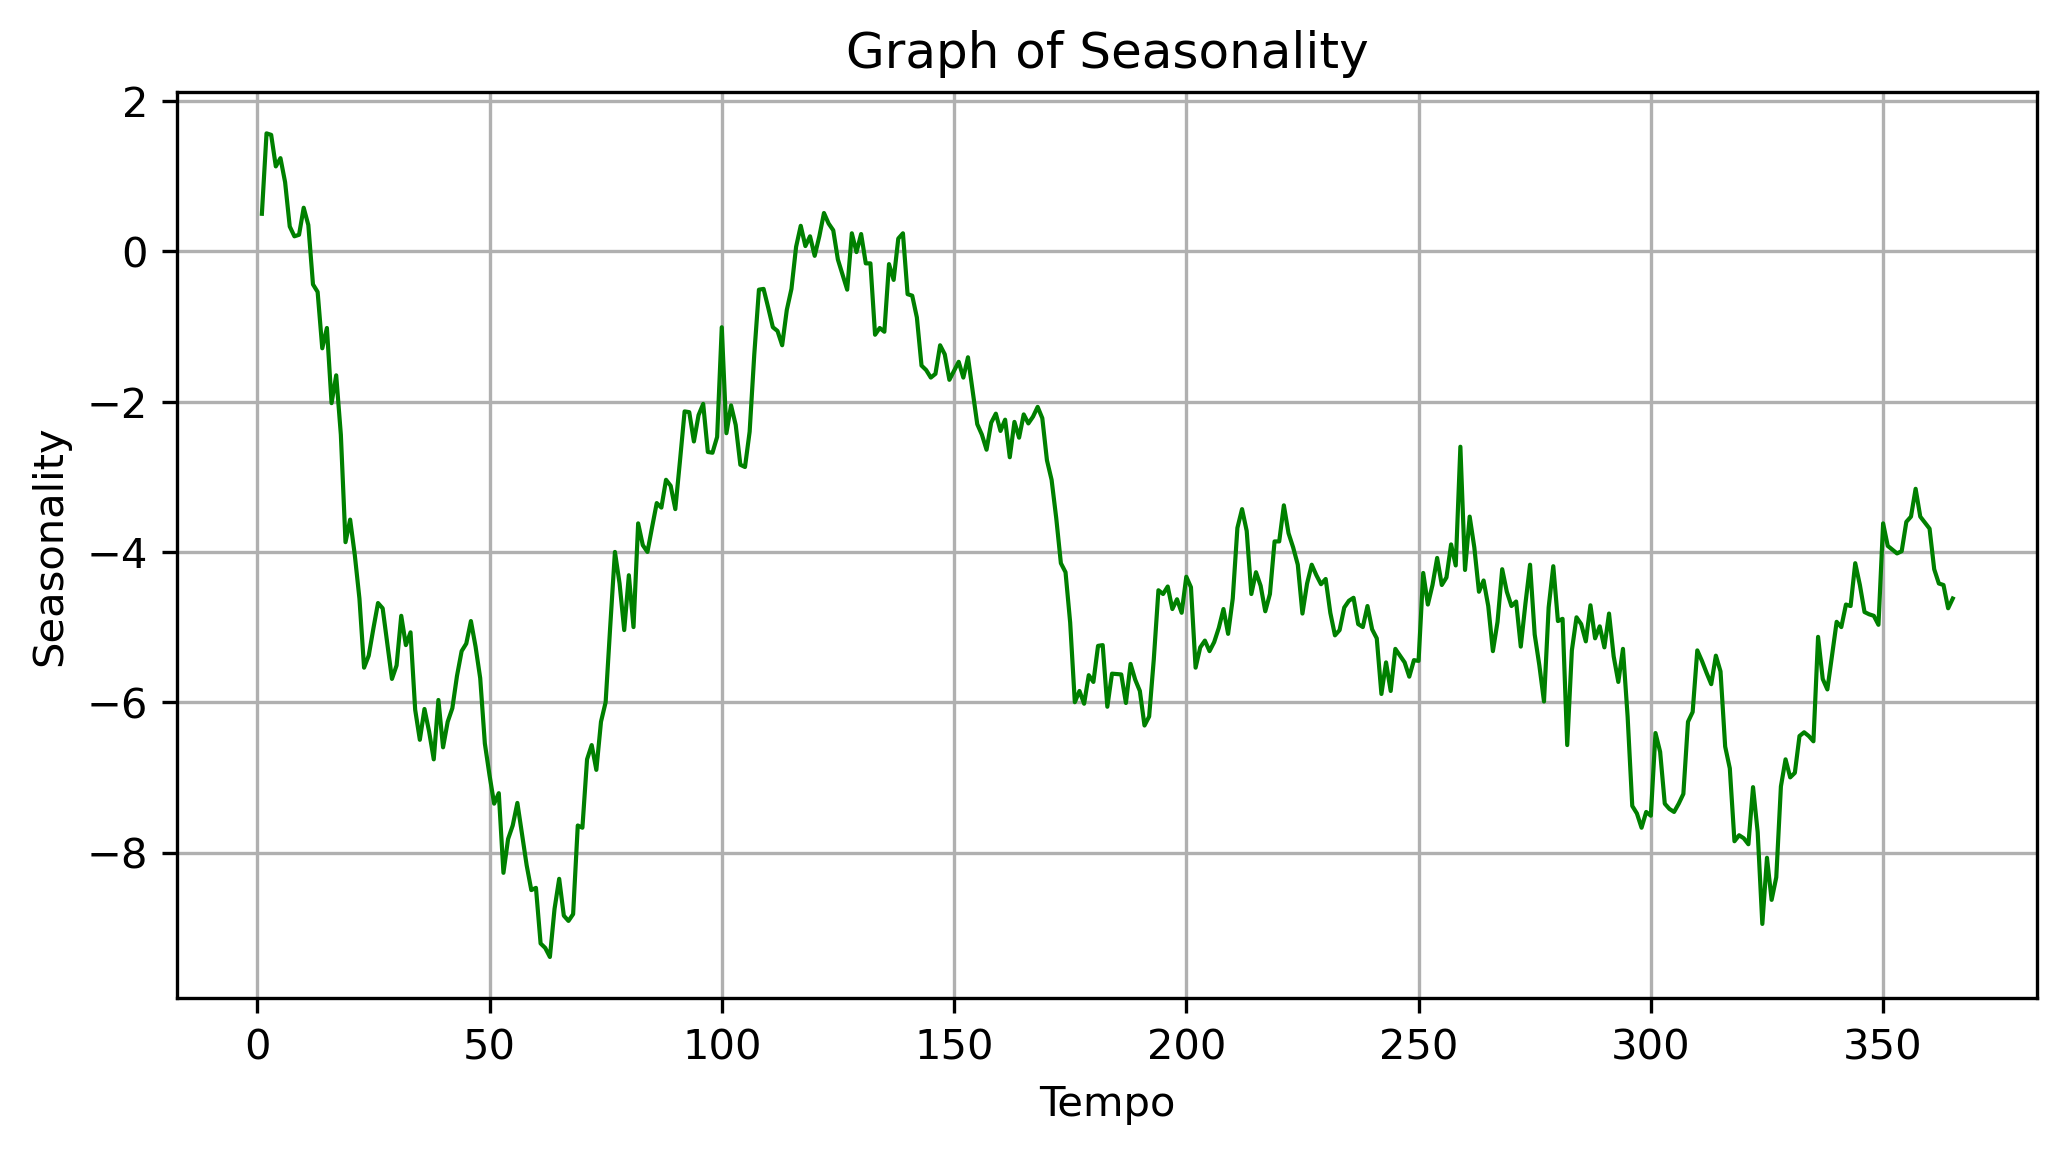

In [18]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=300)

ap = seasonality['Equity'].dropna()

plt.plot(ap, color='green', linewidth=1)

plt.xlabel("Tempo")
plt.ylabel("Seasonality")
plt.title('Graph of Seasonality')
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
import numpy as np
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # necessaria versione >= 1.9.0

import cufflinks as cf

# Per utilizzo con Notebooks
init_notebook_mode(connected=True)

# Per utilizzo offline
cf.go_offline()

seasonality['Equity'].dropna().iplot(kind='line',bins=364, color='green', width=2)

4.7.1


# Versione completa con dizionario e doppia visualizzazione

Confezioniamo il nostro strumento definitivo affinando anche il metodo di visualizzazione:

In [20]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

instrument = pd.read_csv('@GC_1380min.txt', 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument.head(10)

Il file contiene 2997 record


,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,Month
Date_Time,,,,,,,,,
2007-01-02 17:00:00,822.8,827.1,822.1,826.2,824.55,0.41,NaN,2,1
2007-01-03 17:00:00,826.6,830.9,810.6,813.0,820.28,-1.65,-1.60,3,1
2007-01-04 17:00:00,812.9,816.4,806.0,806.9,810.55,-0.74,-0.75,4,1
2007-01-05 17:00:00,807.2,811.5,786.7,792.1,799.38,-1.87,-1.83,5,1
2007-01-08 17:00:00,792.9,796.0,788.6,795.0,793.12,0.26,0.37,8,1
2007-01-09 17:00:00,794.6,801.0,790.6,798.6,796.20,0.50,0.45,9,1
2007-01-10 17:00:00,798.4,798.7,789.8,795.9,795.70,-0.31,-0.34,10,1
2007-01-11 17:00:00,795.6,800.6,793.5,795.5,796.30,-0.01,-0.05,11,1
2007-01-12 17:00:00,795.1,812.4,794.3,811.2,803.25,2.02,1.97,12,1


Aggiungiamo un controllo per definire da input il range temporale all'interno del quale calcolare la stagionalità:

Metodo 1: mediante LOC (riga 18)

In [21]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

instrument = pd.read_csv('@GC_1380min.txt', 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument = instrument.loc[datetime.date(year=2007,month=1,day=1):datetime.date(year=2018,month=8,day=10)]
instrument.tail(10)

Il file contiene 2997 record


,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,Month
Date_Time,,,,,,,,,
2018-07-27 17:00:00,1231.4,1236.5,1226.3,1232.6,1231.70,0.10,0.07,27,7
2018-07-30 17:00:00,1231.1,1234.1,1227.8,1230.2,1230.80,-0.07,-0.19,30,7
2018-07-31 17:00:00,1230.5,1237.8,1222.6,1232.9,1230.95,0.20,0.22,31,7
2018-08-01 17:00:00,1232.7,1233.7,1224.4,1224.5,1228.82,-0.67,-0.68,1,8
2018-08-02 17:00:00,1224.7,1230.0,1215.3,1215.9,1221.47,-0.72,-0.70,2,8
2018-08-03 17:00:00,1216.0,1228.5,1212.5,1221.9,1219.72,0.49,0.49,3,8
2018-08-06 17:00:00,1222.0,1226.0,1214.4,1215.6,1219.50,-0.52,-0.52,6,8
2018-08-07 17:00:00,1215.8,1224.3,1215.6,1218.8,1218.62,0.25,0.26,7,8
2018-08-08 17:00:00,1218.7,1223.8,1213.6,1221.8,1219.47,0.25,0.25,8,8


Metodo 2: mediante PARSING (riga 7-10)

In [22]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

startDate = "20070101"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv('@GC_1380min.txt', 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

Il file contiene 2997 record


,Open,High,Low,Close,AvgPrice,OpenClosePerc,DeltaClosePerc,DayOfMonth,Month
Date_Time,,,,,,,,,
2007-01-02 17:00:00,822.8,827.1,822.1,826.2,824.55,0.41,NaN,2,1
2007-01-03 17:00:00,826.6,830.9,810.6,813.0,820.28,-1.65,-1.60,3,1
2007-01-04 17:00:00,812.9,816.4,806.0,806.9,810.55,-0.74,-0.75,4,1
2007-01-05 17:00:00,807.2,811.5,786.7,792.1,799.38,-1.87,-1.83,5,1
2007-01-08 17:00:00,792.9,796.0,788.6,795.0,793.12,0.26,0.37,8,1
2007-01-09 17:00:00,794.6,801.0,790.6,798.6,796.20,0.50,0.45,9,1
2007-01-10 17:00:00,798.4,798.7,789.8,795.9,795.70,-0.31,-0.34,10,1
2007-01-11 17:00:00,795.6,800.6,793.5,795.5,796.30,-0.01,-0.05,11,1
2007-01-12 17:00:00,795.1,812.4,794.3,811.2,803.25,2.02,1.97,12,1


Creaiamo adesso un dizionario dove conserveremo tutti i risultati dettagliati delle iterazioni giorno per giorno (sia per le fluttuazioni daily (closeToClose) che quelle intraday (OpenToClose):

In [23]:
intraday_seasonality = []
daily_seasonality = []
daysofmonth31 = []
daysofmonth30 = []
daysofmonth29 = []
months = []

d = []

for month in range(1,13):
    months.append(month)

for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)

print(months)
print(daysofmonth31)
print(daysofmonth30)
print(daysofmonth29)
print("")

for month in months:
    if month==2:
        for day in daysofmonth29:
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})
    if month==11 or month==4 or month==6 or month==9:
        for day in daysofmonth30:
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})
    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        for day in daysofmonth31:
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})
    
d[0:10]
#d[-10:-1]
len(d)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]



366

Ora creiamo due array di supporto, per conservare e processare i dati, che uniremo mediante operazione concat insieme alla lista delle date dell'ultimo anno:

In [24]:
intraday_seasonality = []
daily_seasonality = []
daysofmonth31 = []
daysofmonth30 = []
daysofmonth29 = []
months = []

d = []

for month in range(1,13):
    months.append(month)

for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)

print(months)
print(daysofmonth31)
print(daysofmonth30)
print(daysofmonth29)
print("")

for month in months:
    if month==2:
        for day in daysofmonth29:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==11 or month==4 or month==6 or month==9:
        for day in daysofmonth30:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        for day in daysofmonth31:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})
    
print(len(intraday_seasonality))
print(len(daily_seasonality))

s1 = pd.DataFrame(daily_seasonality)
s1.columns = ['Daily_Seasonality']
s1['Daily_Seasonality_Equity'] = s1['Daily_Seasonality'].cumsum()

s2 = pd.DataFrame(intraday_seasonality)
s2.columns = ['Intraday_Seasonality']
s2['Intraday_Seasonality_Equity'] = s2['Intraday_Seasonality'].cumsum()

# Utilizziamo la serie di un anno bisestile
date = pd.DataFrame(pd.date_range('1/1/2016', periods=366, freq='D'))

seasonality = pd.concat([date, s1, s2], axis=1)
#seasonality = date.join(s1, how = "outer")
#seasonality = seasonality.join(s2, how = "outer")
seasonality.index = seasonality[0]
seasonality.index.names = (['Date'])
seasonality.drop(0,axis=1,inplace=True)

seasonality = seasonality.dropna() # Eliminiamo i record vuoti del 1 gennaio e del 25 dicembre
#seasonality = seasonality.fillna(0)

print("Numero di record:", len(seasonality))

seasonality.tail(10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

366
366
Numero di record: 364


,Daily_Seasonality,Daily_Seasonality_Equity,Intraday_Seasonality,Intraday_Seasonality_Equity
Date,,,,
2016-12-21,0.21,4.90,0.23,1.39
2016-12-22,-0.22,4.68,-0.25,1.14
2016-12-23,-0.11,4.57,-0.12,1.02
2016-12-24,0.48,5.05,0.48,1.50
2016-12-26,1.07,6.12,1.11,2.61
2016-12-27,0.07,6.19,0.09,2.70
2016-12-28,0.08,6.27,0.07,2.77
2016-12-29,0.11,6.38,0.07,2.84
2016-12-30,-0.18,6.20,-0.21,2.63


Modulo Grafico con Matplotlib:

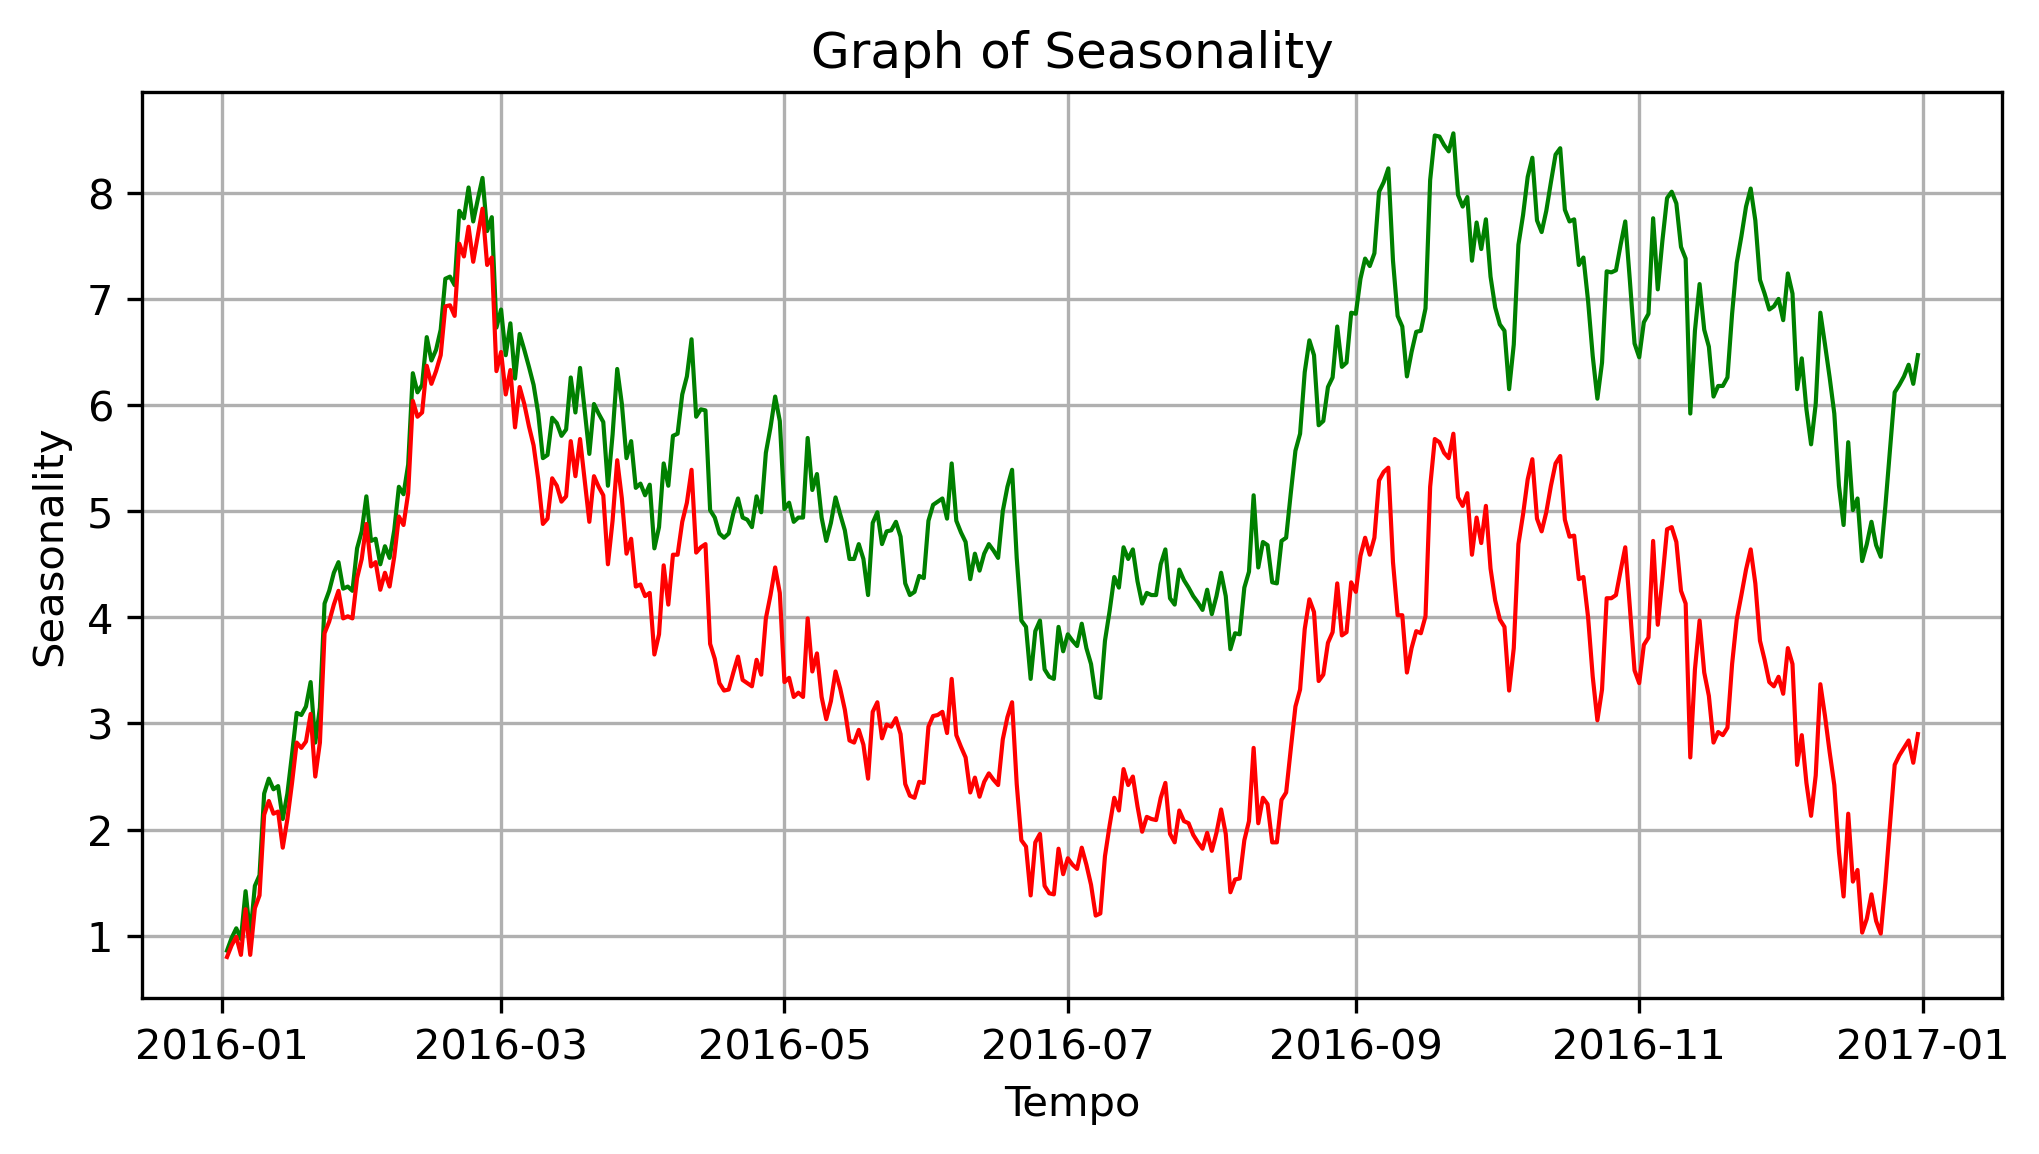

In [25]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=300)

plt.plot(seasonality['Daily_Seasonality_Equity'], color='green', linewidth=1)
plt.plot(seasonality['Intraday_Seasonality_Equity'], color='red', linewidth=1)

plt.xlabel("Tempo")
plt.ylabel("Seasonality")
plt.title('Graph of Seasonality')
plt.grid(True)
plt.show()

Modulo Grafico Plotly&Cufflinks:

4.7.1


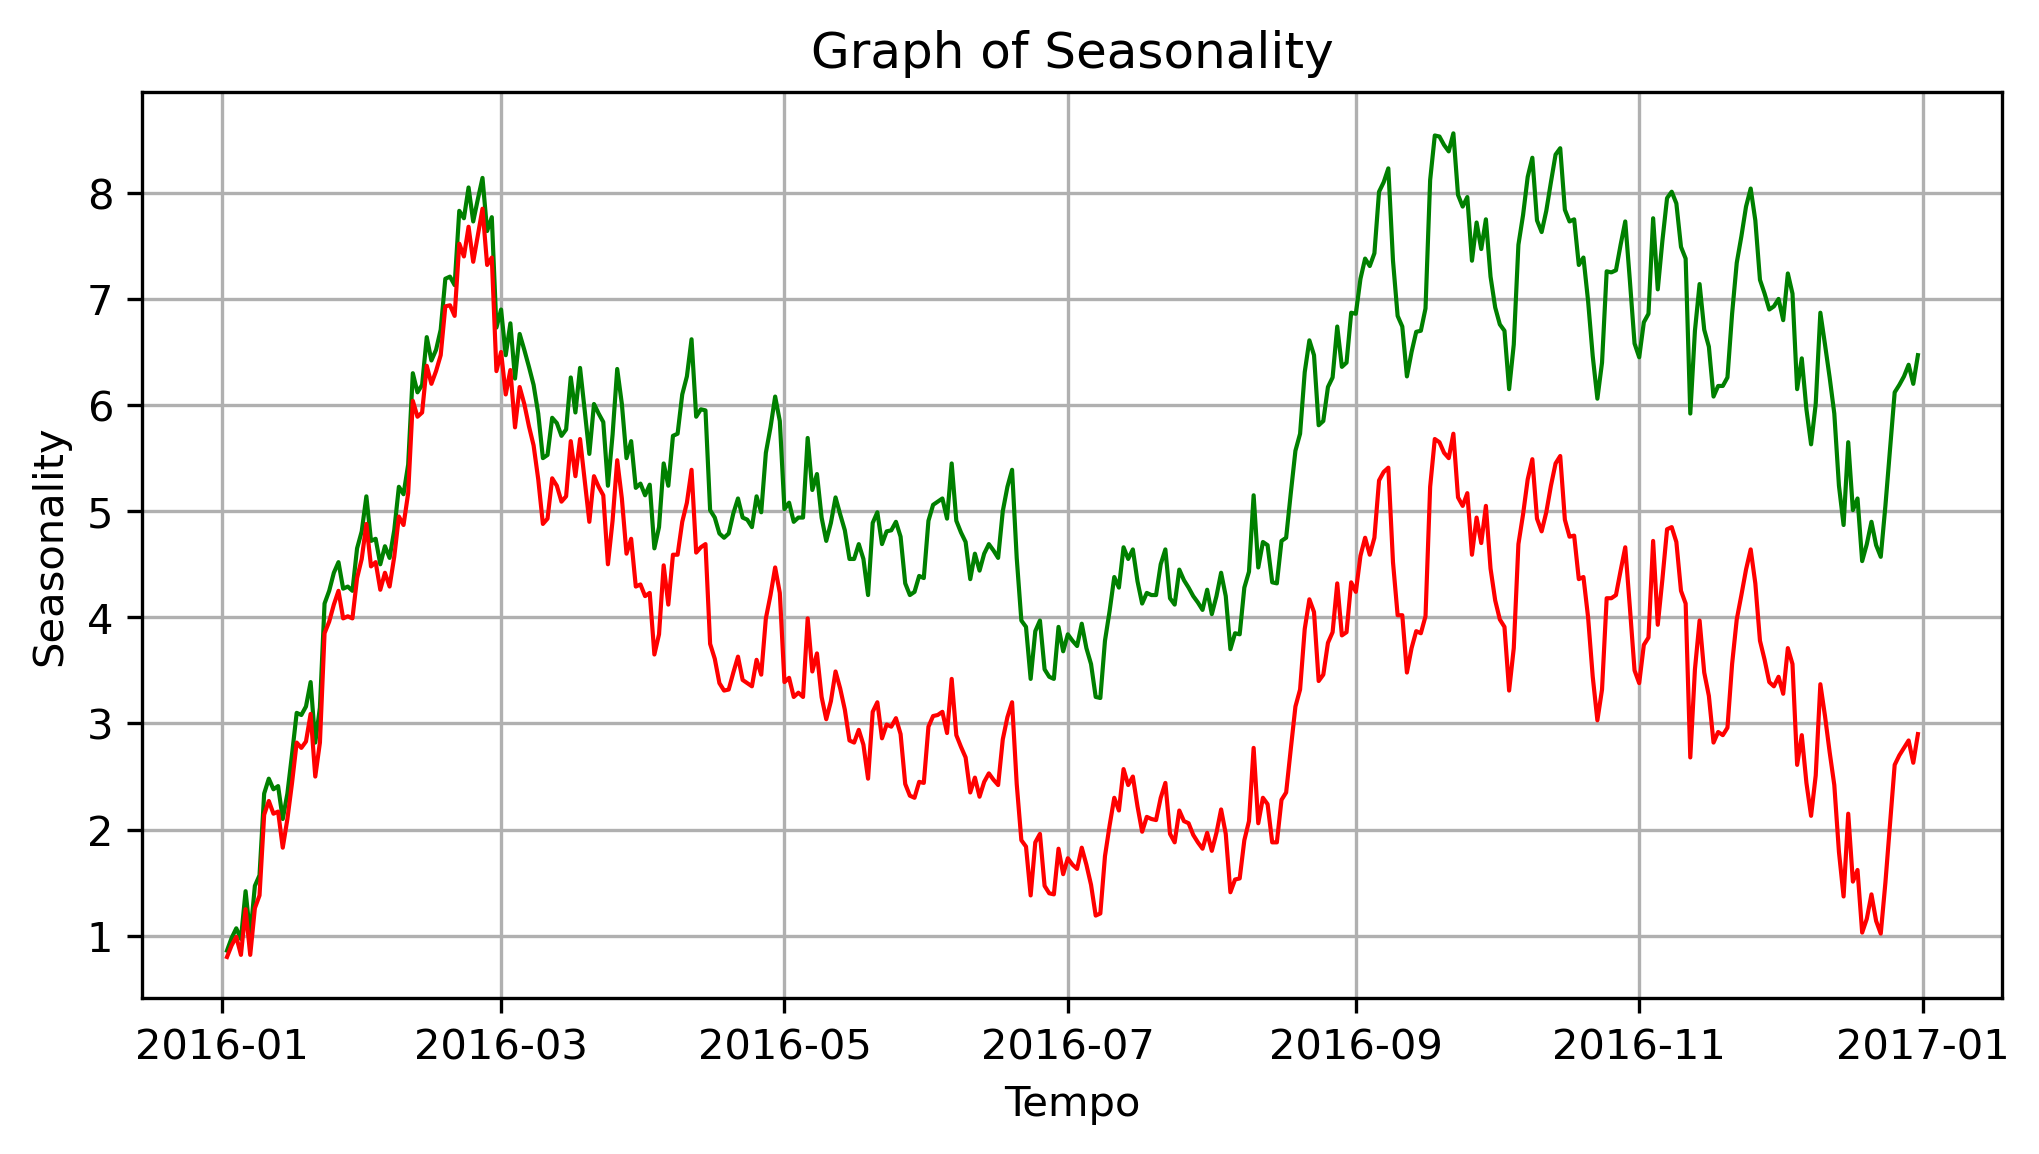

In [26]:
import pandas as pd
import numpy as np
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # necessaria versione >= 1.9.0

import cufflinks as cf

# Per utilizzo con Notebooks
#init_notebook_mode(connected=True)

# Per utilizzo offline
cf.go_offline()

# ************** MODULO GRAFICO **********************************************************************************
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=300)

plt.plot(seasonality['Daily_Seasonality_Equity'], color='green', linewidth=1)
plt.plot(seasonality['Intraday_Seasonality_Equity'], color='red', linewidth=1)

plt.xlabel("Tempo")
plt.ylabel("Seasonality")
plt.title('Graph of Seasonality')
plt.grid(True)
plt.show()

seasonality.iplot()
seasonality['Daily_Seasonality_Equity'].iplot(kind='line', color='green', width=2, showlegend=True)
seasonality['Intraday_Seasonality_Equity'].iplot(kind='line', color='red', width=2, showlegend=True)
# ************** MODULO GRAFICO **********************************************************************************

# Codice Completo #1

Il file contiene 2997 record
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

366
366
Numero di record: 364


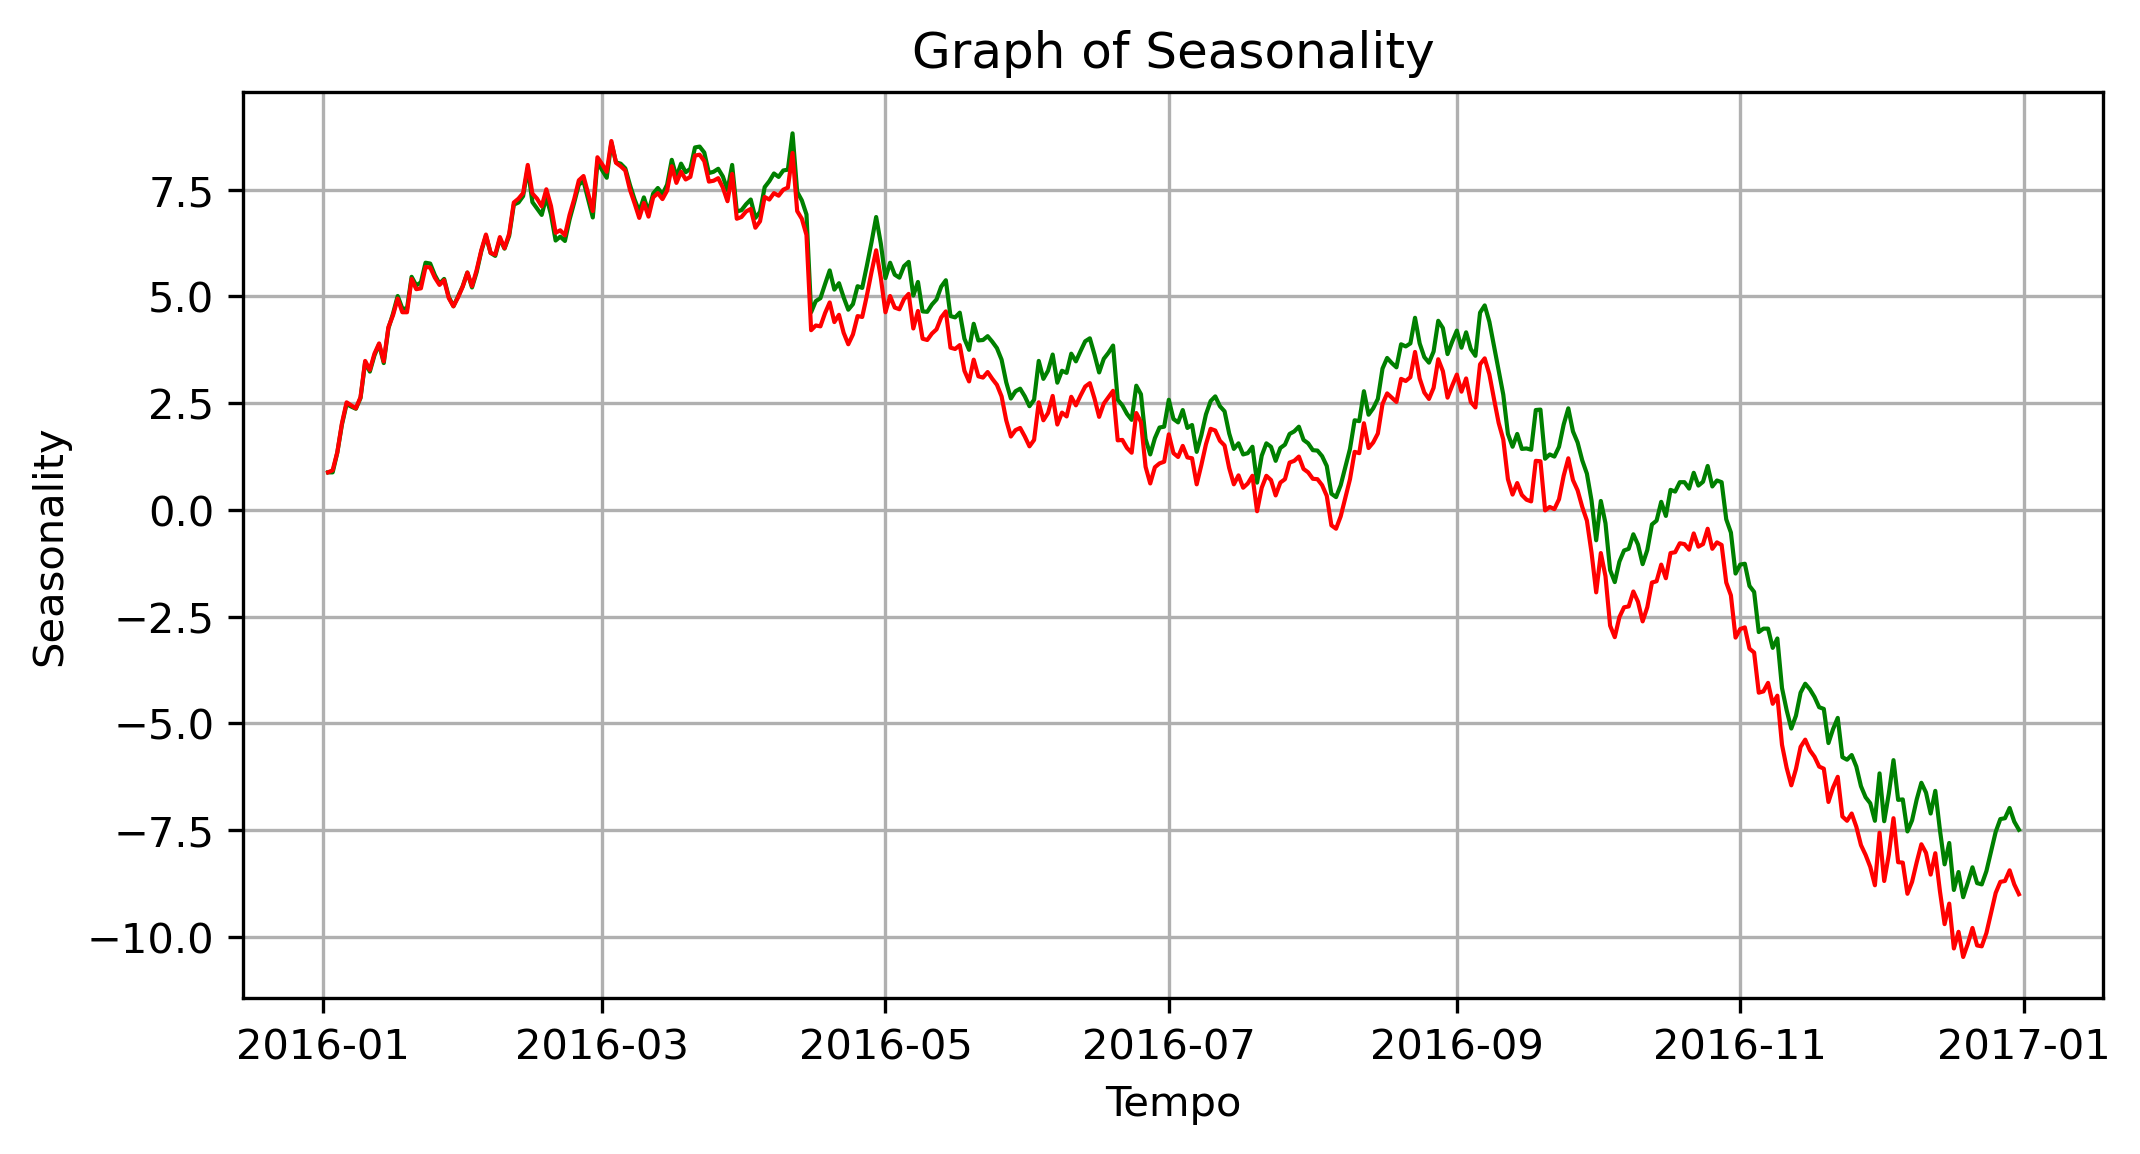

In [27]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

startDate = "20130101"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv('@GC_1380min.txt', 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

intraday_seasonality = []
daily_seasonality = []
daysofmonth31 = []
daysofmonth30 = []
daysofmonth29 = []
months = []

d = []

for month in range(1,13):
    months.append(month)

for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)

print(months)
print(daysofmonth31)
print(daysofmonth30)
print(daysofmonth29)
print("")

for month in months:
    if month==2:
        for day in daysofmonth29:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==11 or month==4 or month==6 or month==9:
        for day in daysofmonth30:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        for day in daysofmonth31:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})
    
print(len(intraday_seasonality))
print(len(daily_seasonality))

s1 = pd.DataFrame(daily_seasonality)
s1.columns = ['Daily_Seasonality']
s1['Daily_Seasonality_Equity'] = s1['Daily_Seasonality'].cumsum()

s2 = pd.DataFrame(intraday_seasonality)
s2.columns = ['Intraday_Seasonality']
s2['Intraday_Seasonality_Equity'] = s2['Intraday_Seasonality'].cumsum()

# Utilizziamo la serie di un anno bisestile
date = pd.DataFrame(pd.date_range('1/1/2016', periods=366, freq='D'))

seasonality = pd.concat([date, s1, s2], axis=1)
#seasonality = date.join(s1, how = "outer")
#seasonality = seasonality.join(s2, how = "outer")
seasonality.index = seasonality[0]
seasonality.index.names = (['Date'])
seasonality.drop(0,axis=1,inplace=True)

seasonality = seasonality.dropna() # Eliminiamo i record vuoti del 1 gennaio e del 25 dicembre
#seasonality = seasonality.fillna(0)

print("Numero di record:", len(seasonality))

seasonality.tail(10)

# ************** MODULO GRAFICO **********************************************************************************
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=300)

plt.plot(seasonality['Daily_Seasonality_Equity'], color='green', linewidth=1)
plt.plot(seasonality['Intraday_Seasonality_Equity'], color='red', linewidth=1)

plt.xlabel("Tempo")
plt.ylabel("Seasonality")
plt.title('Graph of Seasonality')
plt.grid(True)
plt.show()

seasonality.iplot()
seasonality['Daily_Seasonality_Equity'].iplot(kind='line', color='green', width=2, showlegend=True)
seasonality['Intraday_Seasonality_Equity'].iplot(kind='line', color='red', width=2, showlegend=True)
# ************** MODULO GRAFICO **********************************************************************************

# Calcoliamo le stagionalità mensili:

In [28]:
monthly = seasonality.resample('M').mean()
monthly

,Daily_Seasonality,Daily_Seasonality_Equity,Intraday_Seasonality,Intraday_Seasonality_Equity
Date,,,,
2016-01-31,0.174667,3.991333,0.174333,3.973667
2016-02-29,0.100000,6.737931,0.104483,6.835862
2016-03-31,-0.036129,7.783548,-0.045161,7.655806
2016-04-30,-0.026000,6.380667,-0.047333,5.834667
2016-05-31,-0.115484,4.407419,-0.120000,3.618387
2016-06-30,-0.023667,2.940333,-0.019667,2.025000
2016-07-31,-0.012581,1.775806,-0.008065,1.023548
2016-08-31,0.076774,2.697742,0.065484,1.898065
2016-09-30,-0.124000,2.414333,-0.130333,1.249667


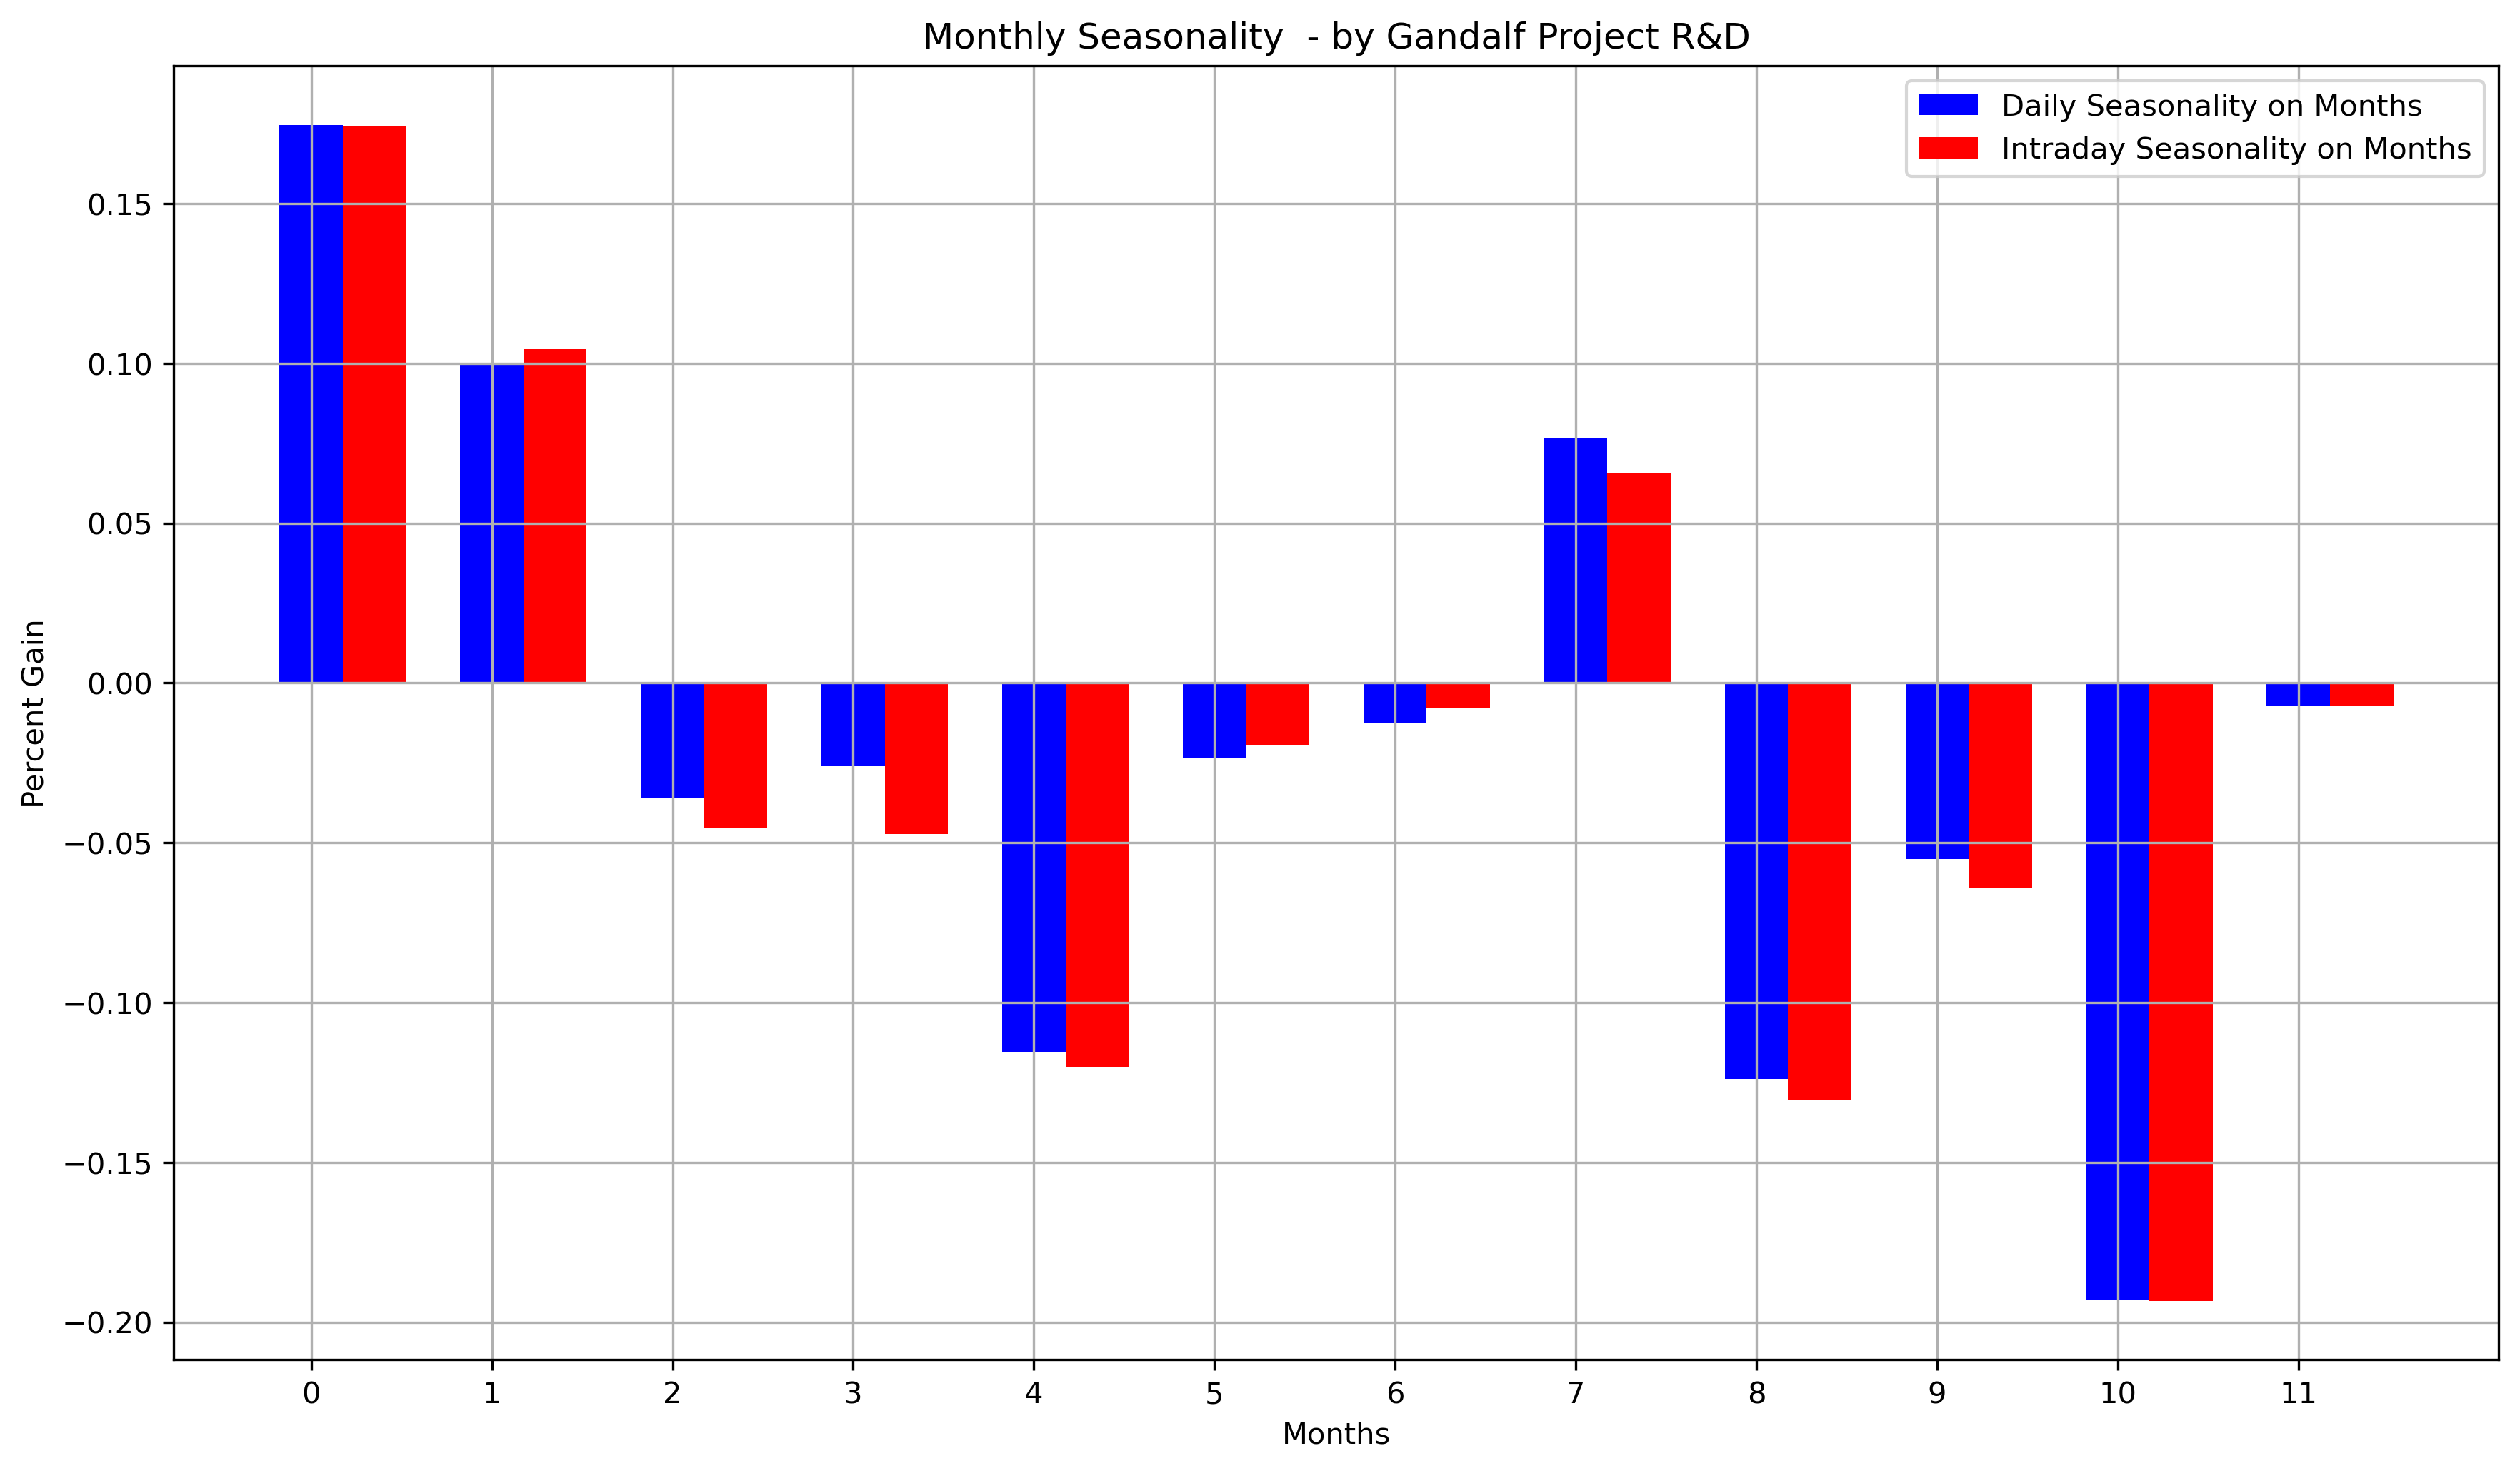

In [29]:
# ************** MODULO GRAFICO **********************************************************************************
m1 = monthly["Daily_Seasonality"]
m2 = monthly["Intraday_Seasonality"]

n_groups = 12

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                m1, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Daily Seasonality on Months')

rects2 = ax.bar(index + bar_width, 
                m2, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Seasonality on Months')

ax.set_xlabel('Months')
ax.set_ylabel('Percent Gain')
ax.set_title('Monthly Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((index))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************

O utilizzando la libreria grafica di Pandas:

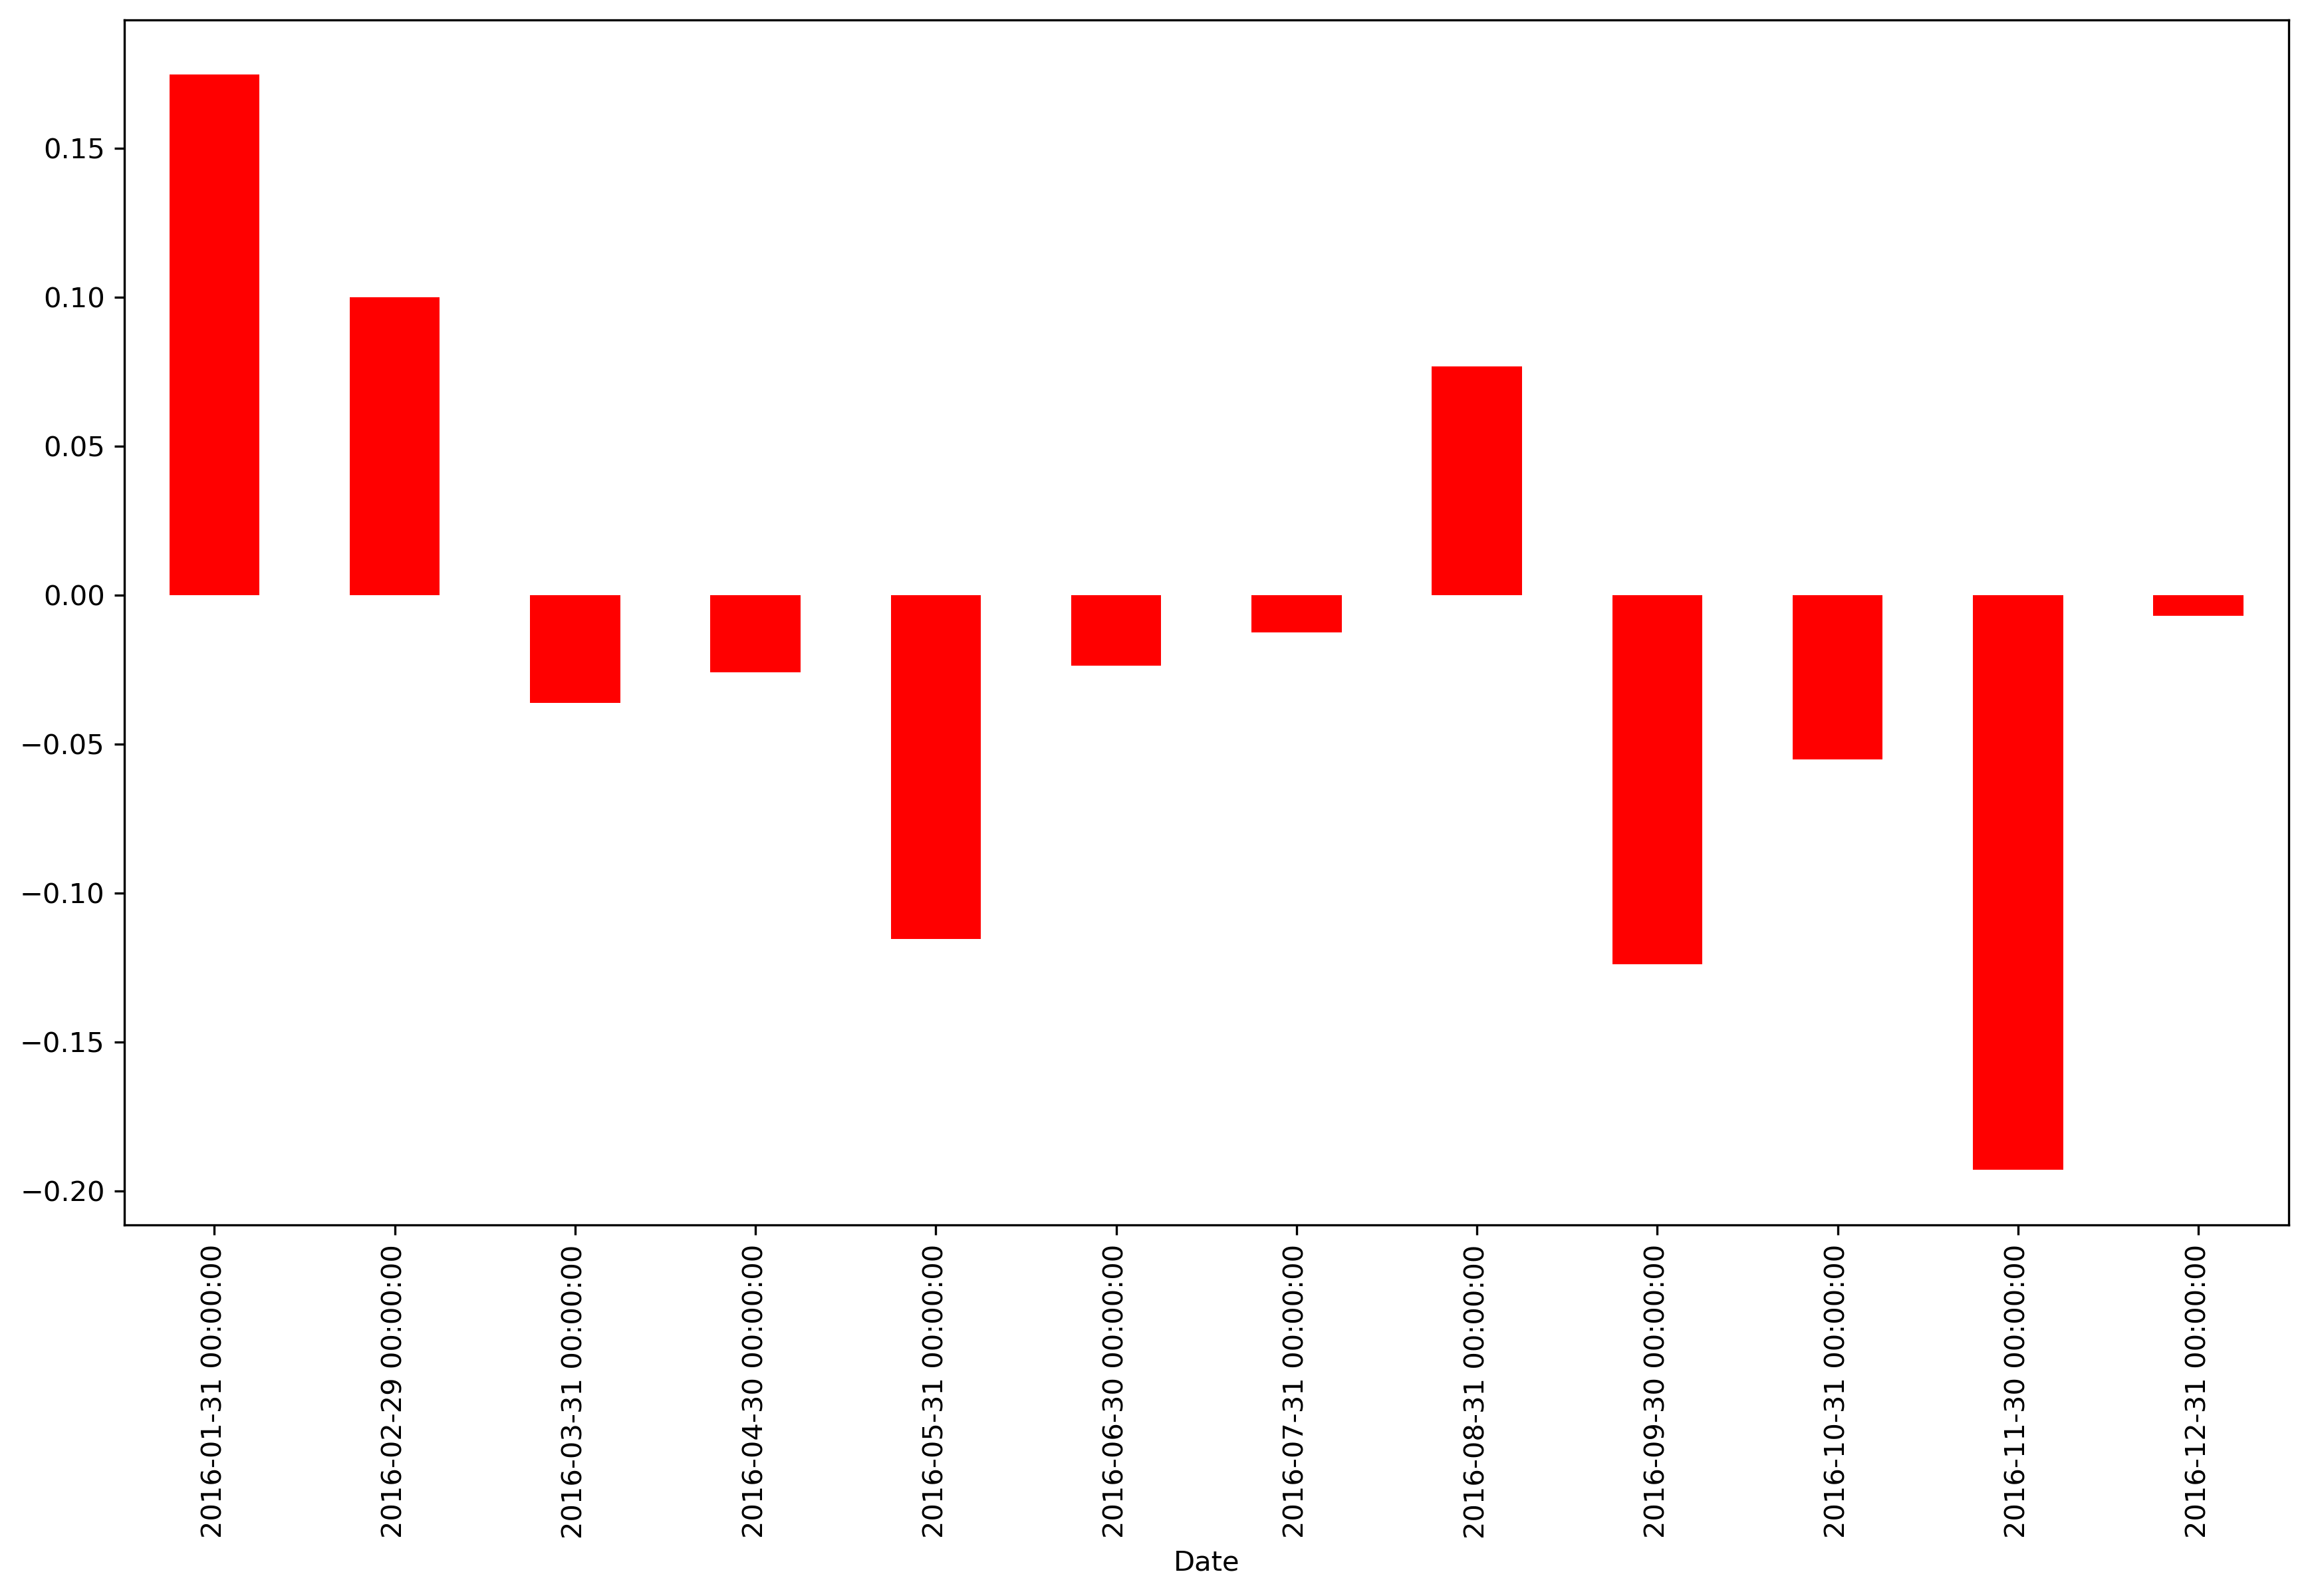

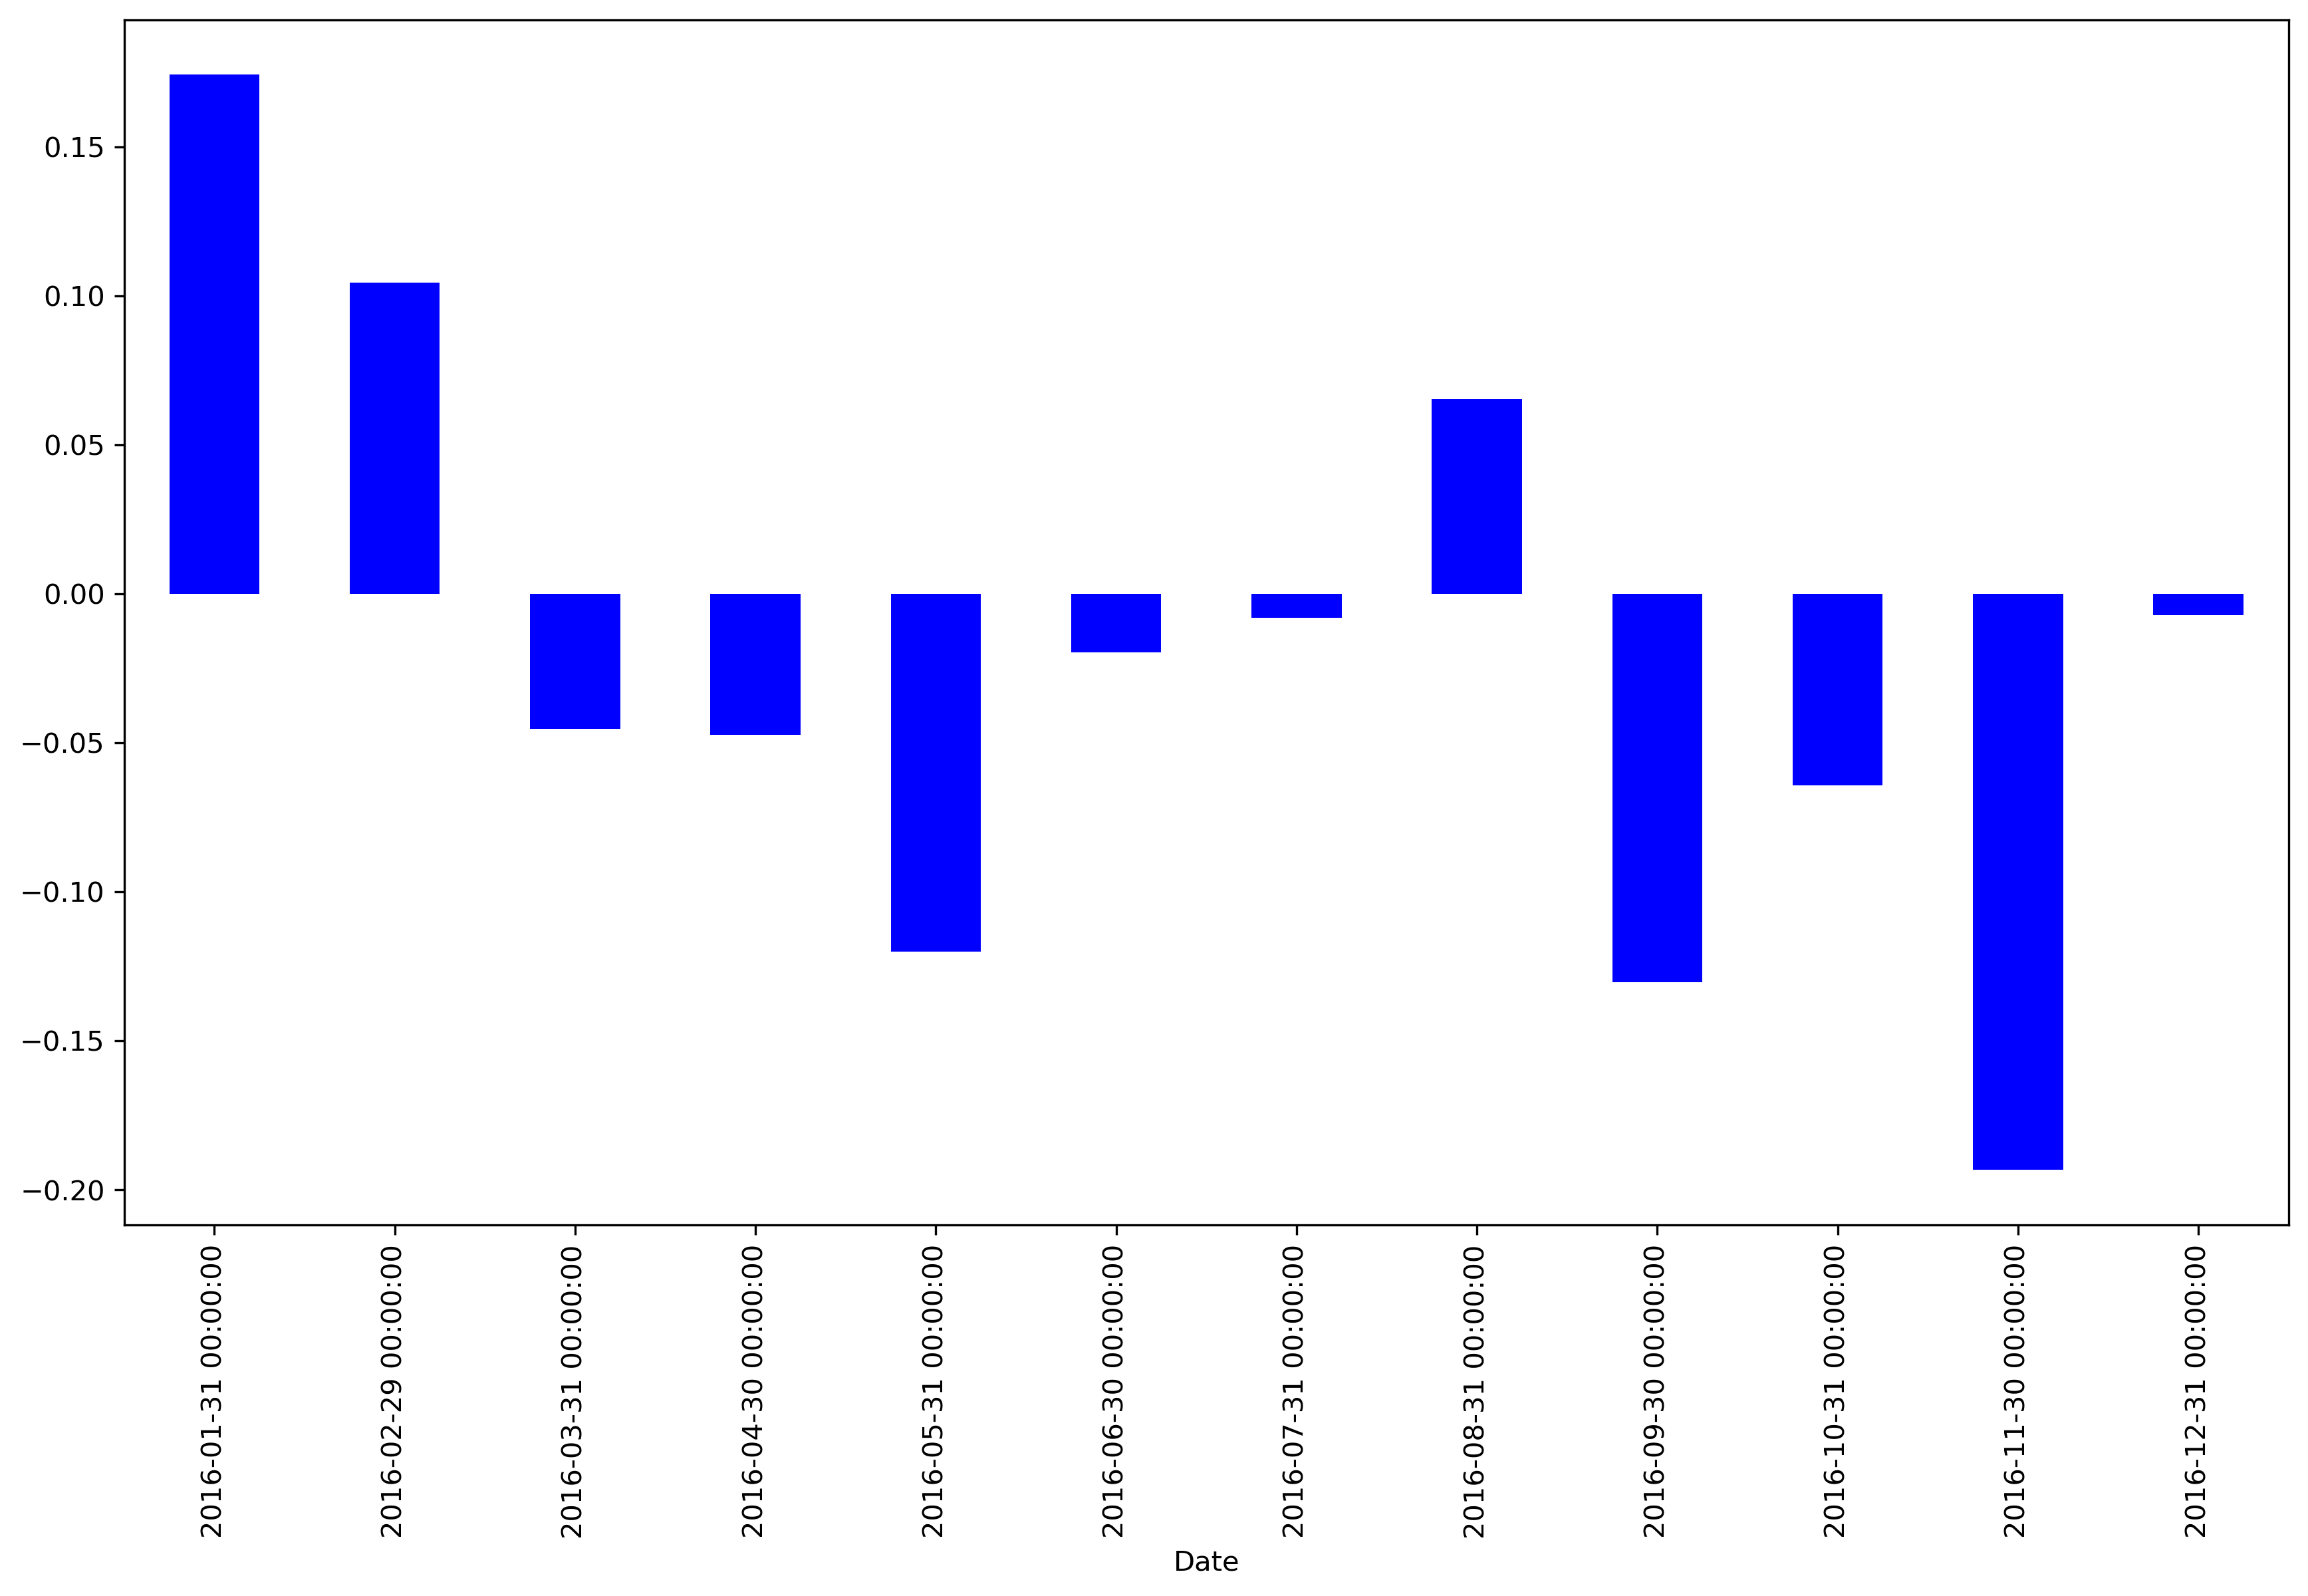

In [30]:
m1 = monthly["Daily_Seasonality"]
m2 = monthly["Intraday_Seasonality"]

plt.subplots(figsize=(14, 8), dpi=300)
m1.plot(kind='bar',x='Date', y=m1[0], color = 'r')
plt.show()

plt.subplots(figsize=(14, 8), dpi=300)
m2.plot(kind='bar',x='Date', y=m2[0], color = 'b')
plt.show()

# Codice Completo #2

Il file contiene 2997 record
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

366
366
Numero di record: 364


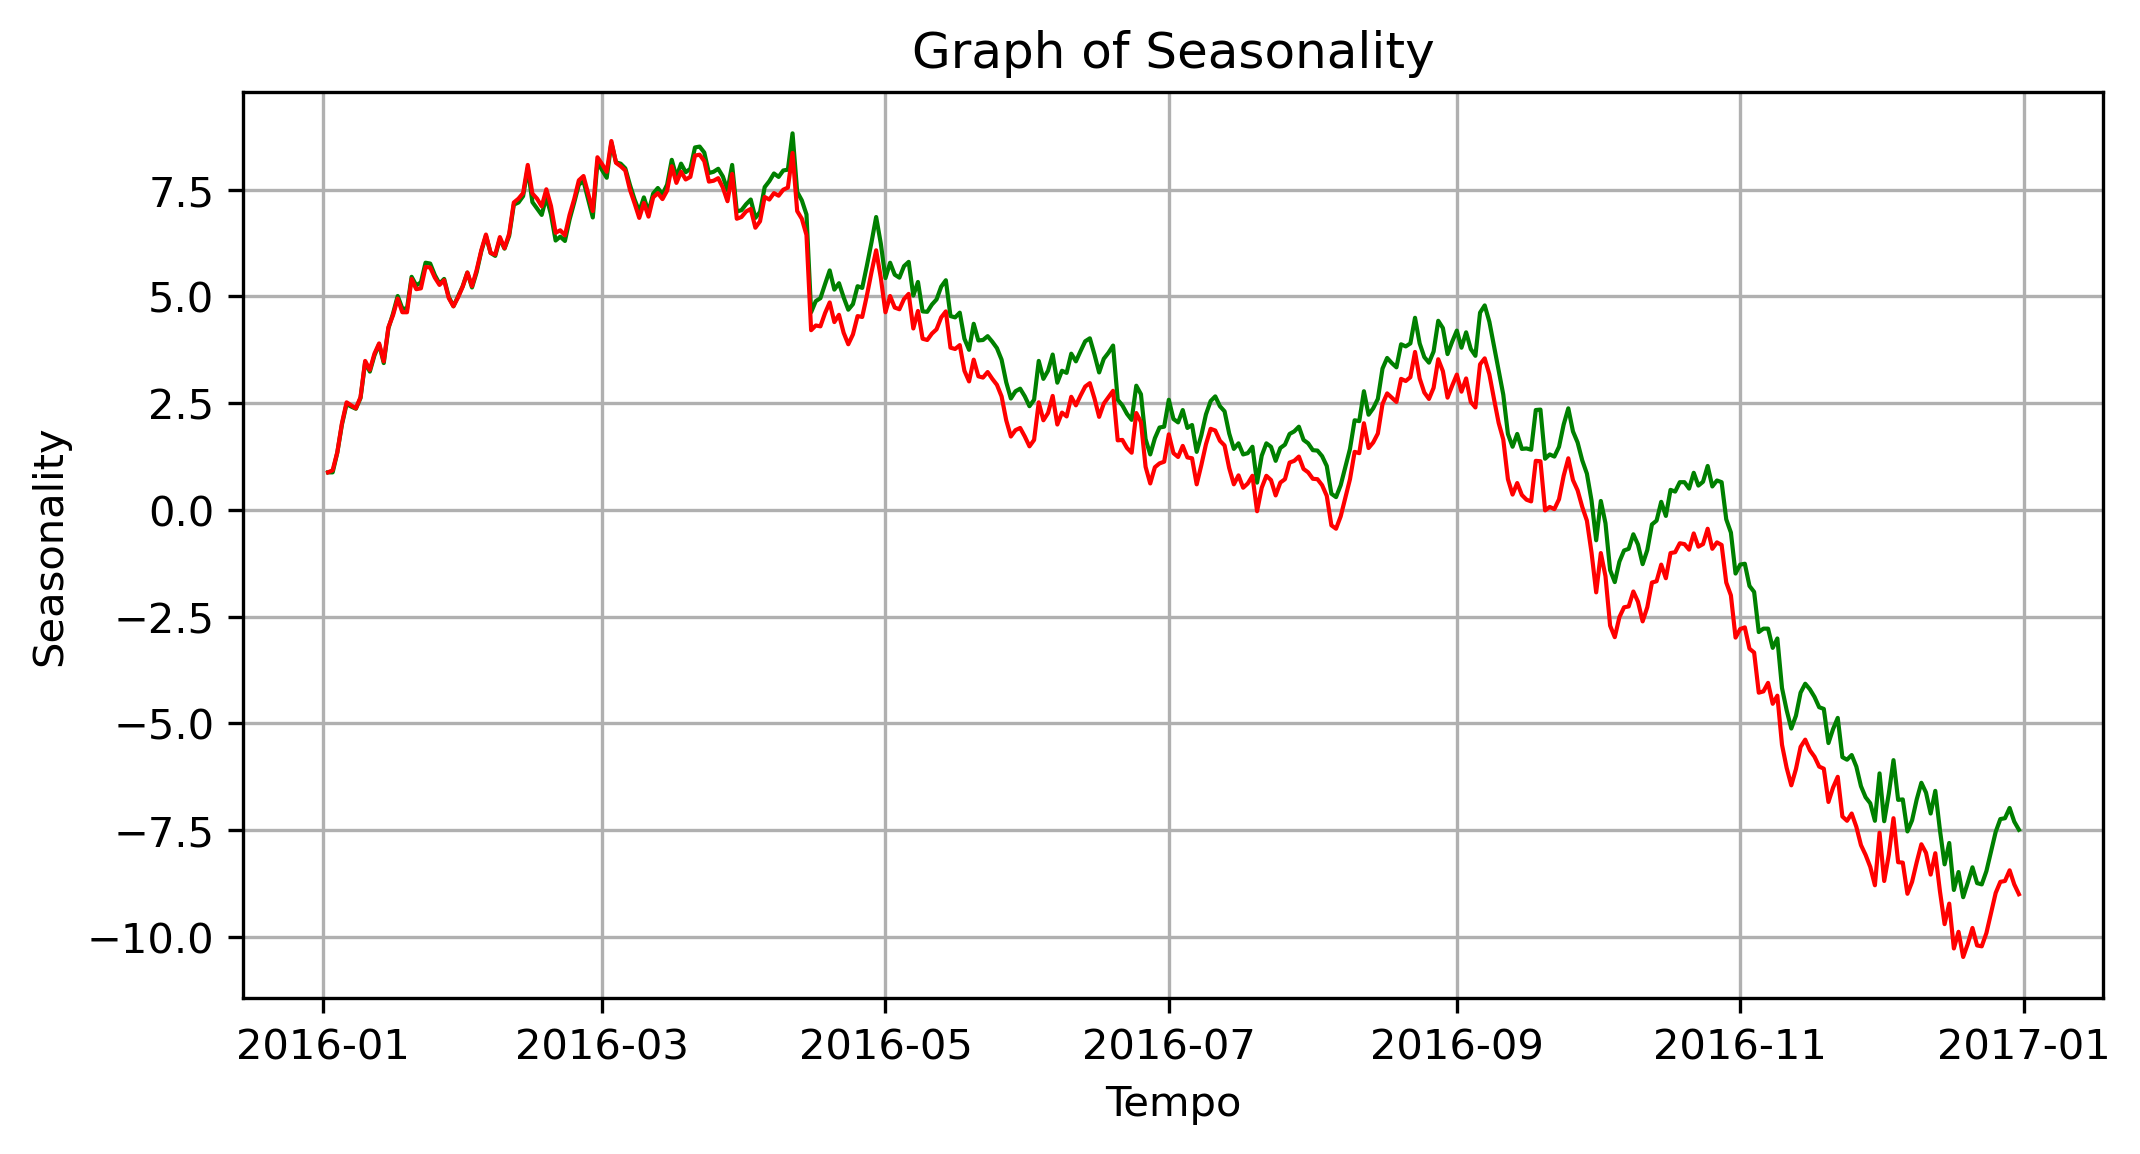

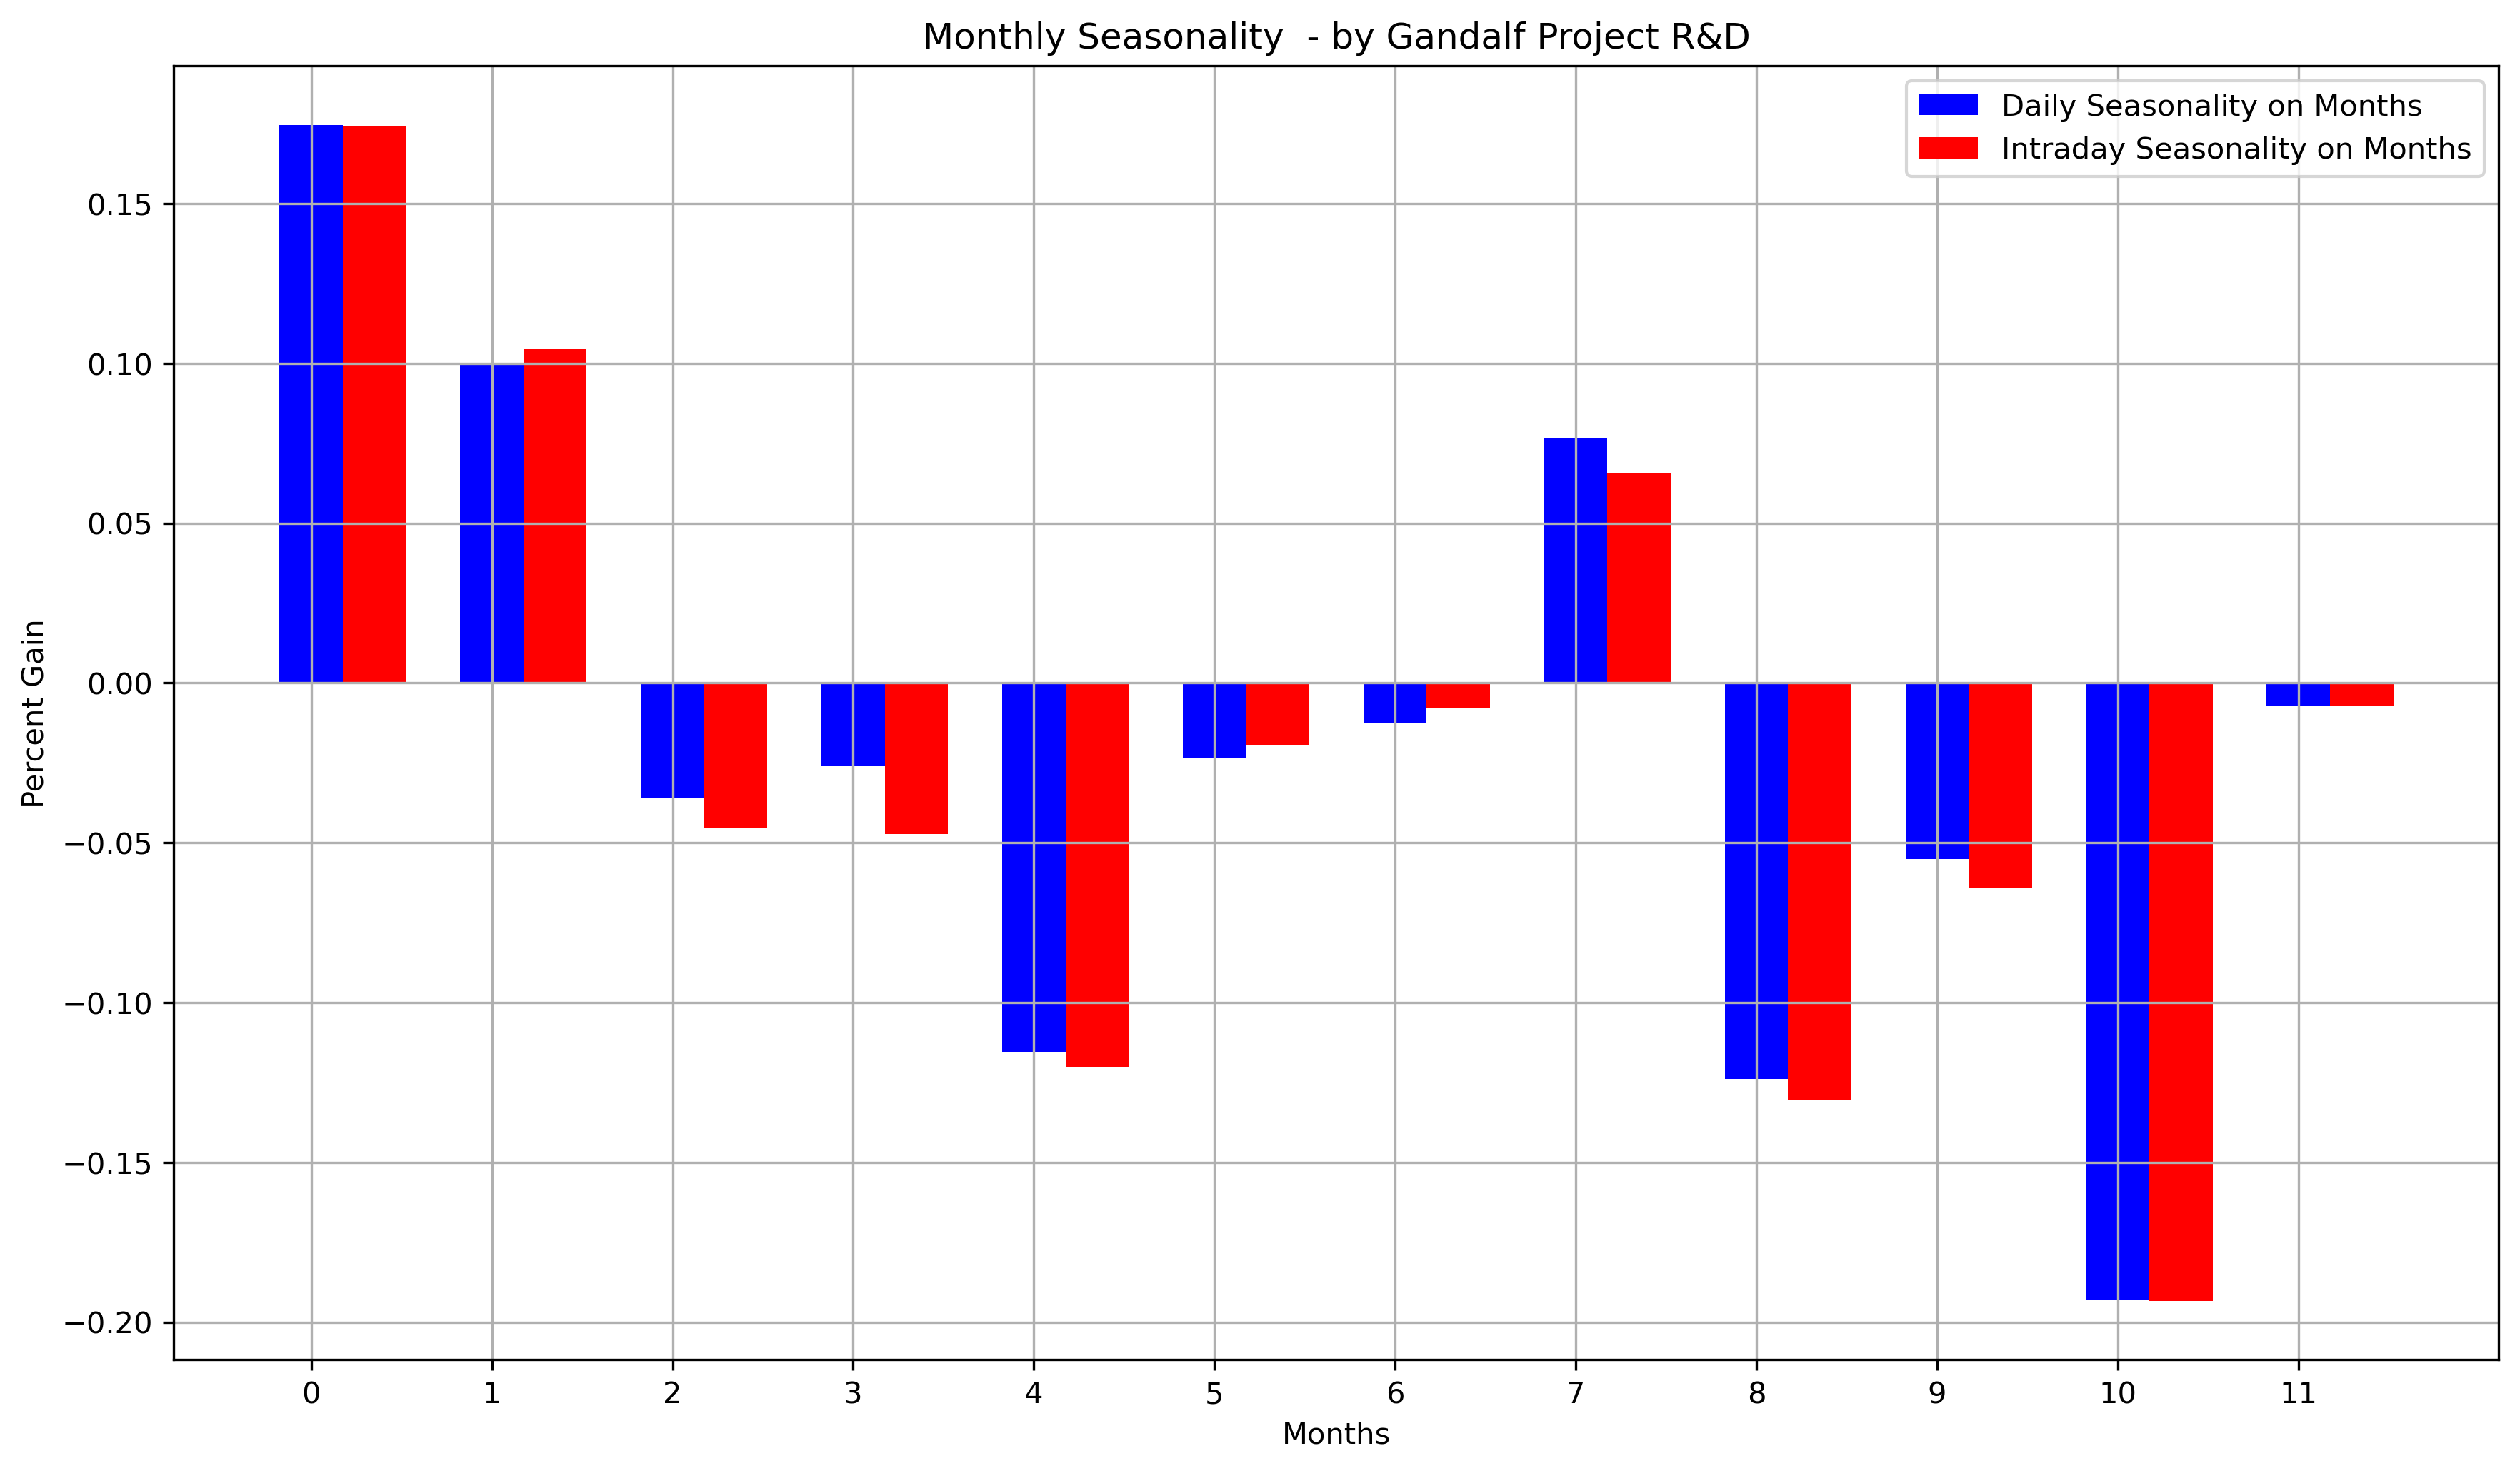

In [31]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

startDate = "20130101"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv('@GC_1380min.txt', 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

intraday_seasonality = []
daily_seasonality = []
daysofmonth31 = []
daysofmonth30 = []
daysofmonth29 = []
months = []

d = []

for month in range(1,13):
    months.append(month)

for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)

print(months)
print(daysofmonth31)
print(daysofmonth30)
print(daysofmonth29)
print("")

for month in months:
    if month==2:
        for day in daysofmonth29:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==11 or month==4 or month==6 or month==9:
        for day in daysofmonth30:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        for day in daysofmonth31:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})
    
print(len(intraday_seasonality))
print(len(daily_seasonality))

s1 = pd.DataFrame(daily_seasonality)
s1.columns = ['Daily_Seasonality']
s1['Daily_Seasonality_Equity'] = s1['Daily_Seasonality'].cumsum()

s2 = pd.DataFrame(intraday_seasonality)
s2.columns = ['Intraday_Seasonality']
s2['Intraday_Seasonality_Equity'] = s2['Intraday_Seasonality'].cumsum()

# Utilizziamo la serie di un anno bisestile
date = pd.DataFrame(pd.date_range('1/1/2016', periods=366, freq='D'))

seasonality = pd.concat([date, s1, s2], axis=1)
#seasonality = date.join(s1, how = "outer")
#seasonality = seasonality.join(s2, how = "outer")
seasonality.index = seasonality[0]
seasonality.index.names = (['Date'])
seasonality.drop(0,axis=1,inplace=True)

seasonality = seasonality.dropna() # Eliminiamo i record vuoti del 1 gennaio e del 25 dicembre
#seasonality = seasonality.fillna(0)

print("Numero di record:", len(seasonality))

seasonality.tail(10)

# ************** MODULO GRAFICO **********************************************************************************
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=300)

plt.plot(seasonality['Daily_Seasonality_Equity'], color='green', linewidth=1)
plt.plot(seasonality['Intraday_Seasonality_Equity'], color='red', linewidth=1)

plt.xlabel("Tempo")
plt.ylabel("Seasonality")
plt.title('Graph of Seasonality')
plt.grid(True)
plt.show()

seasonality.iplot()
seasonality['Daily_Seasonality_Equity'].iplot(kind='line', color='green', width=2, showlegend=True)
seasonality['Intraday_Seasonality_Equity'].iplot(kind='line', color='red', width=2, showlegend=True)
# ************** MODULO GRAFICO **********************************************************************************

monthly = seasonality.resample('M').mean()
monthly

# ************** MODULO GRAFICO **********************************************************************************
m1 = monthly["Daily_Seasonality"]
m2 = monthly["Intraday_Seasonality"]

n_groups = 12

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                m1, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Daily Seasonality on Months')

rects2 = ax.bar(index + bar_width, 
                m2, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Seasonality on Months')

ax.set_xlabel('Months')
ax.set_ylabel('Percent Gain')
ax.set_title('Monthly Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((index))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************

# Calcoliamo le statistiche relative ad un periodo di osservazione in input

Ricarichiamo lo storico di base aggiungendo i campi: OpenClosePercEquity e DeltaClosePercEquity

In [32]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # necessaria versione >= 1.9.0

import cufflinks as cf

# Per utilizzo con Notebooks
#init_notebook_mode(connected=True)

# Per utilizzo offline
cf.go_offline()

filename = "@GC_1380min.txt"

startDate = "20070810"
endDate = "20180810"
startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['OpenClosePercEquity'] = instrument['OpenClosePerc'].cumsum()
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DeltaClosePercEquity'] = instrument['DeltaClosePerc'].cumsum()
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

4.7.1


Il file contiene 2997 record


,Open,High,Low,Close,AvgPrice,OpenClosePerc,OpenClosePercEquity,DeltaClosePerc,DeltaClosePercEquity,DayOfMonth,Month
Date_Time,,,,,,,,,,,
2007-08-10 17:00:00,824.2,839.5,820.9,835.7,830.08,1.40,-0.15,1.35,1.65,10,8
2007-08-13 17:00:00,834.8,835.8,831.2,832.3,833.53,-0.30,-0.45,-0.41,1.24,13,8
2007-08-14 17:00:00,832.1,834.3,828.4,831.9,831.68,-0.02,-0.47,-0.05,1.19,14,8
2007-08-15 17:00:00,832.1,833.9,824.7,830.5,830.30,-0.19,-0.66,-0.17,1.02,15,8
2007-08-16 17:00:00,829.9,830.6,803.7,814.3,819.62,-1.88,-2.54,-1.95,-0.93,16,8
2007-08-17 17:00:00,812.9,826.6,807.6,819.6,816.68,0.82,-1.72,0.65,-0.28,17,8
2007-08-20 17:00:00,819.1,822.7,814.4,819.4,818.90,0.04,-1.68,-0.02,-0.30,20,8
2007-08-21 17:00:00,819.7,821.9,816.0,819.1,819.18,-0.07,-1.75,-0.04,-0.34,21,8
2007-08-22 17:00:00,819.1,823.7,816.3,822.4,820.38,0.40,-1.35,0.40,0.06,22,8


In [33]:
startPeriod = {"day": 1, "month": 1}
endPeriod = {"day": 1, "month": 2}
startPeriodParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endPeriodParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

print(startPeriod['day'])

1


In [34]:
years = instrument.resample('A').mean().index.year
print(years)

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018],
           dtype='int64', name='Date_Time')


In [35]:
CheckOK = []
CheckKO = []

def PeriodStats(equity):
    if equity[-1] > equity[0]:
        return 1
    else:
        return 0

for year in years:
    start = datetime.date(int(year), int(startPeriod['month']), int(startPeriod['day']))
    end = datetime.date(int(year), int(endPeriod['month']), int(endPeriod['day']))
    print("Analisi dal", start, "al", end)
    prov = instrument.loc[start:end]
    print(prov['OpenClosePercEquity'])
    if instrument.loc[start:end].empty == False:
        buffer = prov['OpenClosePercEquity']
        CheckOK.append(PeriodStats(buffer))
        
print("")
print(CheckOK)
print("")
#print(sum(CheckOK))
Result = round(sum(CheckOK)/len(years)*100,2)
print("Percentuale occorrenze positive annuali:", Result, "equivalente a", sum(CheckOK), "su", len(years), "anni")

Analisi dal 2007-01-01 al 2007-02-01
Series([], Name: OpenClosePercEquity, dtype: float64)
Analisi dal 2008-01-01 al 2008-02-01
Date_Time
2008-01-02 17:00:00    19.12
2008-01-03 17:00:00    19.75
2008-01-04 17:00:00    19.40
2008-01-07 17:00:00    19.19
2008-01-08 17:00:00    21.17
2008-01-09 17:00:00    21.22
2008-01-10 17:00:00    22.59
2008-01-11 17:00:00    22.64
2008-01-14 17:00:00    23.20
2008-01-15 17:00:00    21.70
2008-01-16 17:00:00    20.43
2008-01-17 17:00:00    20.44
2008-01-18 17:00:00    20.83
2008-01-21 17:00:00    19.21
2008-01-22 17:00:00    22.09
2008-01-23 17:00:00    21.96
2008-01-24 17:00:00    23.92
2008-01-25 17:00:00    23.89
2008-01-28 17:00:00    25.47
2008-01-29 17:00:00    25.01
2008-01-30 17:00:00    25.42
2008-01-31 17:00:00    25.15
Name: OpenClosePercEquity, dtype: float64
Analisi dal 2009-01-01 al 2009-02-01
Date_Time
2009-01-02 17:00:00    15.46
2009-01-05 17:00:00    13.36
2009-01-06 17:00:00    13.90
2009-01-07 17:00:00    11.70
2009-01-08 17:00:00

### Codice Compatto

4.7.1


Il file contiene 2997 record
1
Anni di Test: Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018],
           dtype='int64', name='Date_Time')

[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]

[6.030000000000001, 4.350000000000001, -3.6499999999999915, -5.530000000000008, 7.470000000000006, -1.1099999999999994, 2.1000000000000085, 7.459999999999994, 3.7199999999999953, 3.810000000000006, 1.4900000000000233]

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

Percentuale occorrenze positive annuali: 66.67 equivalente a 8 su 12 anni
Sommatoria delta percentuali del periodo di osservazione calcolata su tutti gli anni: 26.140000000000036


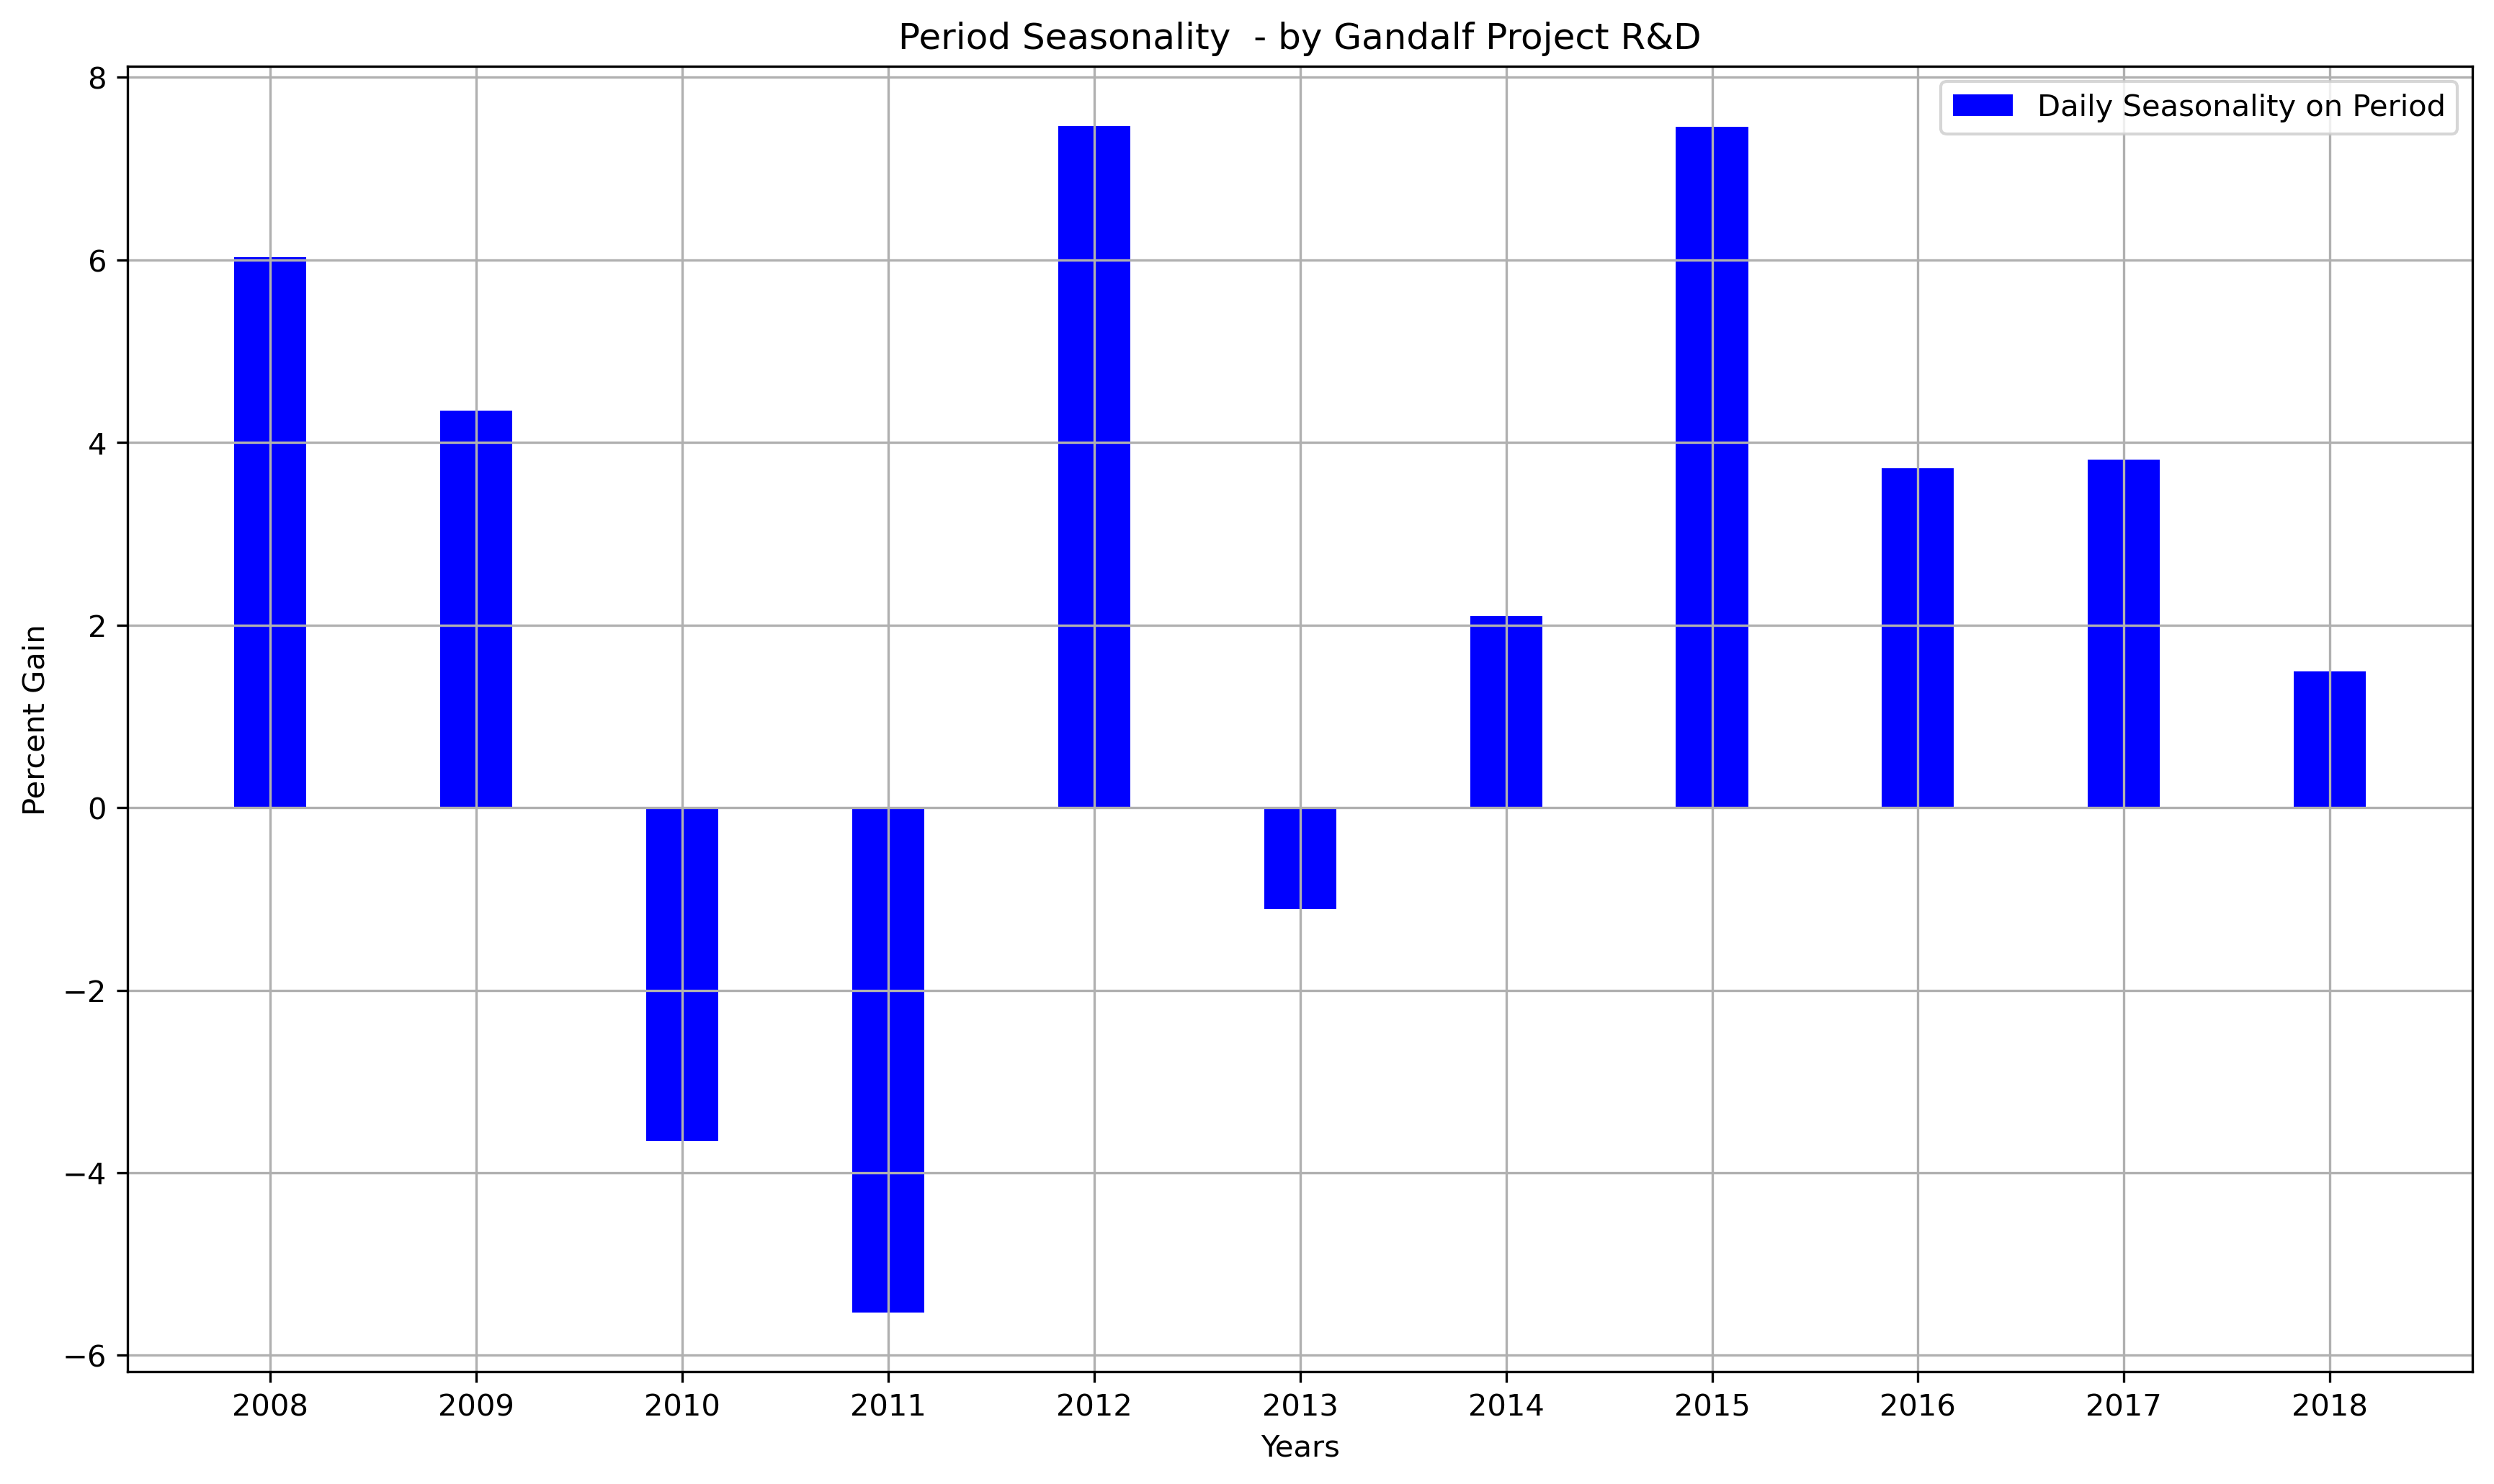

In [36]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # necessaria versione >= 1.9.0

import cufflinks as cf

# Per utilizzo con Notebooks
#init_notebook_mode(connected=True)

# Per utilizzo offline
cf.go_offline()

def PeriodStats(equity):
    if equity[-1] > equity[0]:
        return 1
    else:
        return 0
    
def PeriodDelta(equity):
    return equity[-1] - equity[0]

# INPUT ***********************************************************************************************************
filename = "@GC_1380min.txt"

# Periodo dello storico
startDate = "20070810"
endDate = "20180810"

# Periodo di osservazione su cui calcolare le statistiche
startPeriod = {"day": 1, "month": 1}
endPeriod = {"day": 1, "month": 2}
# INPUT ***********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

startPeriodParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endPeriodParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['OpenClosePercEquity'] = instrument['OpenClosePerc'].cumsum()
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DeltaClosePercEquity'] = instrument['DeltaClosePerc'].cumsum()
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

print(startPeriod['day'])

years = instrument.resample('A').mean().index.year
print("Anni di Test:", years)

CheckOK = []
Delta = []
YearsList = []

for year in years:
    start = datetime.date(int(year), int(startPeriod['month']), int(startPeriod['day']))
    end = datetime.date(int(year), int(endPeriod['month']), int(endPeriod['day']))
    #print("Analisi dal", start, "al", end)
    prov = instrument.loc[start:end]
    #print(prov['OpenClosePercEquity'])
    if instrument.loc[start:end].empty == False:
        buffer = prov['OpenClosePercEquity']
        CheckOK.append(PeriodStats(buffer))
        Delta.append(PeriodDelta(buffer))
        YearsList.append(year)
        
print("")
print(CheckOK)
print("")
print(Delta)
print("")
print(YearsList)
print("")
#print(sum(CheckOK))
Result = round(sum(CheckOK)/len(years)*100,2)

print("Percentuale occorrenze positive annuali:", Result, "equivalente a", sum(CheckOK), "su", len(years), "anni")
print("Sommatoria delta percentuali del periodo di osservazione calcolata su tutti gli anni:", sum(Delta))

# ************** MODULO GRAFICO **********************************************************************************
n_groups = len(CheckOK)

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                 Delta, 
                 bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Daily Seasonality on Period')

ax.set_xlabel('Years')
ax.set_ylabel('Percent Gain')
ax.set_title('Period Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((YearsList))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************

# Codice Completo #3

4.7.1


Il file contiene 2997 record
Numero di record: 364


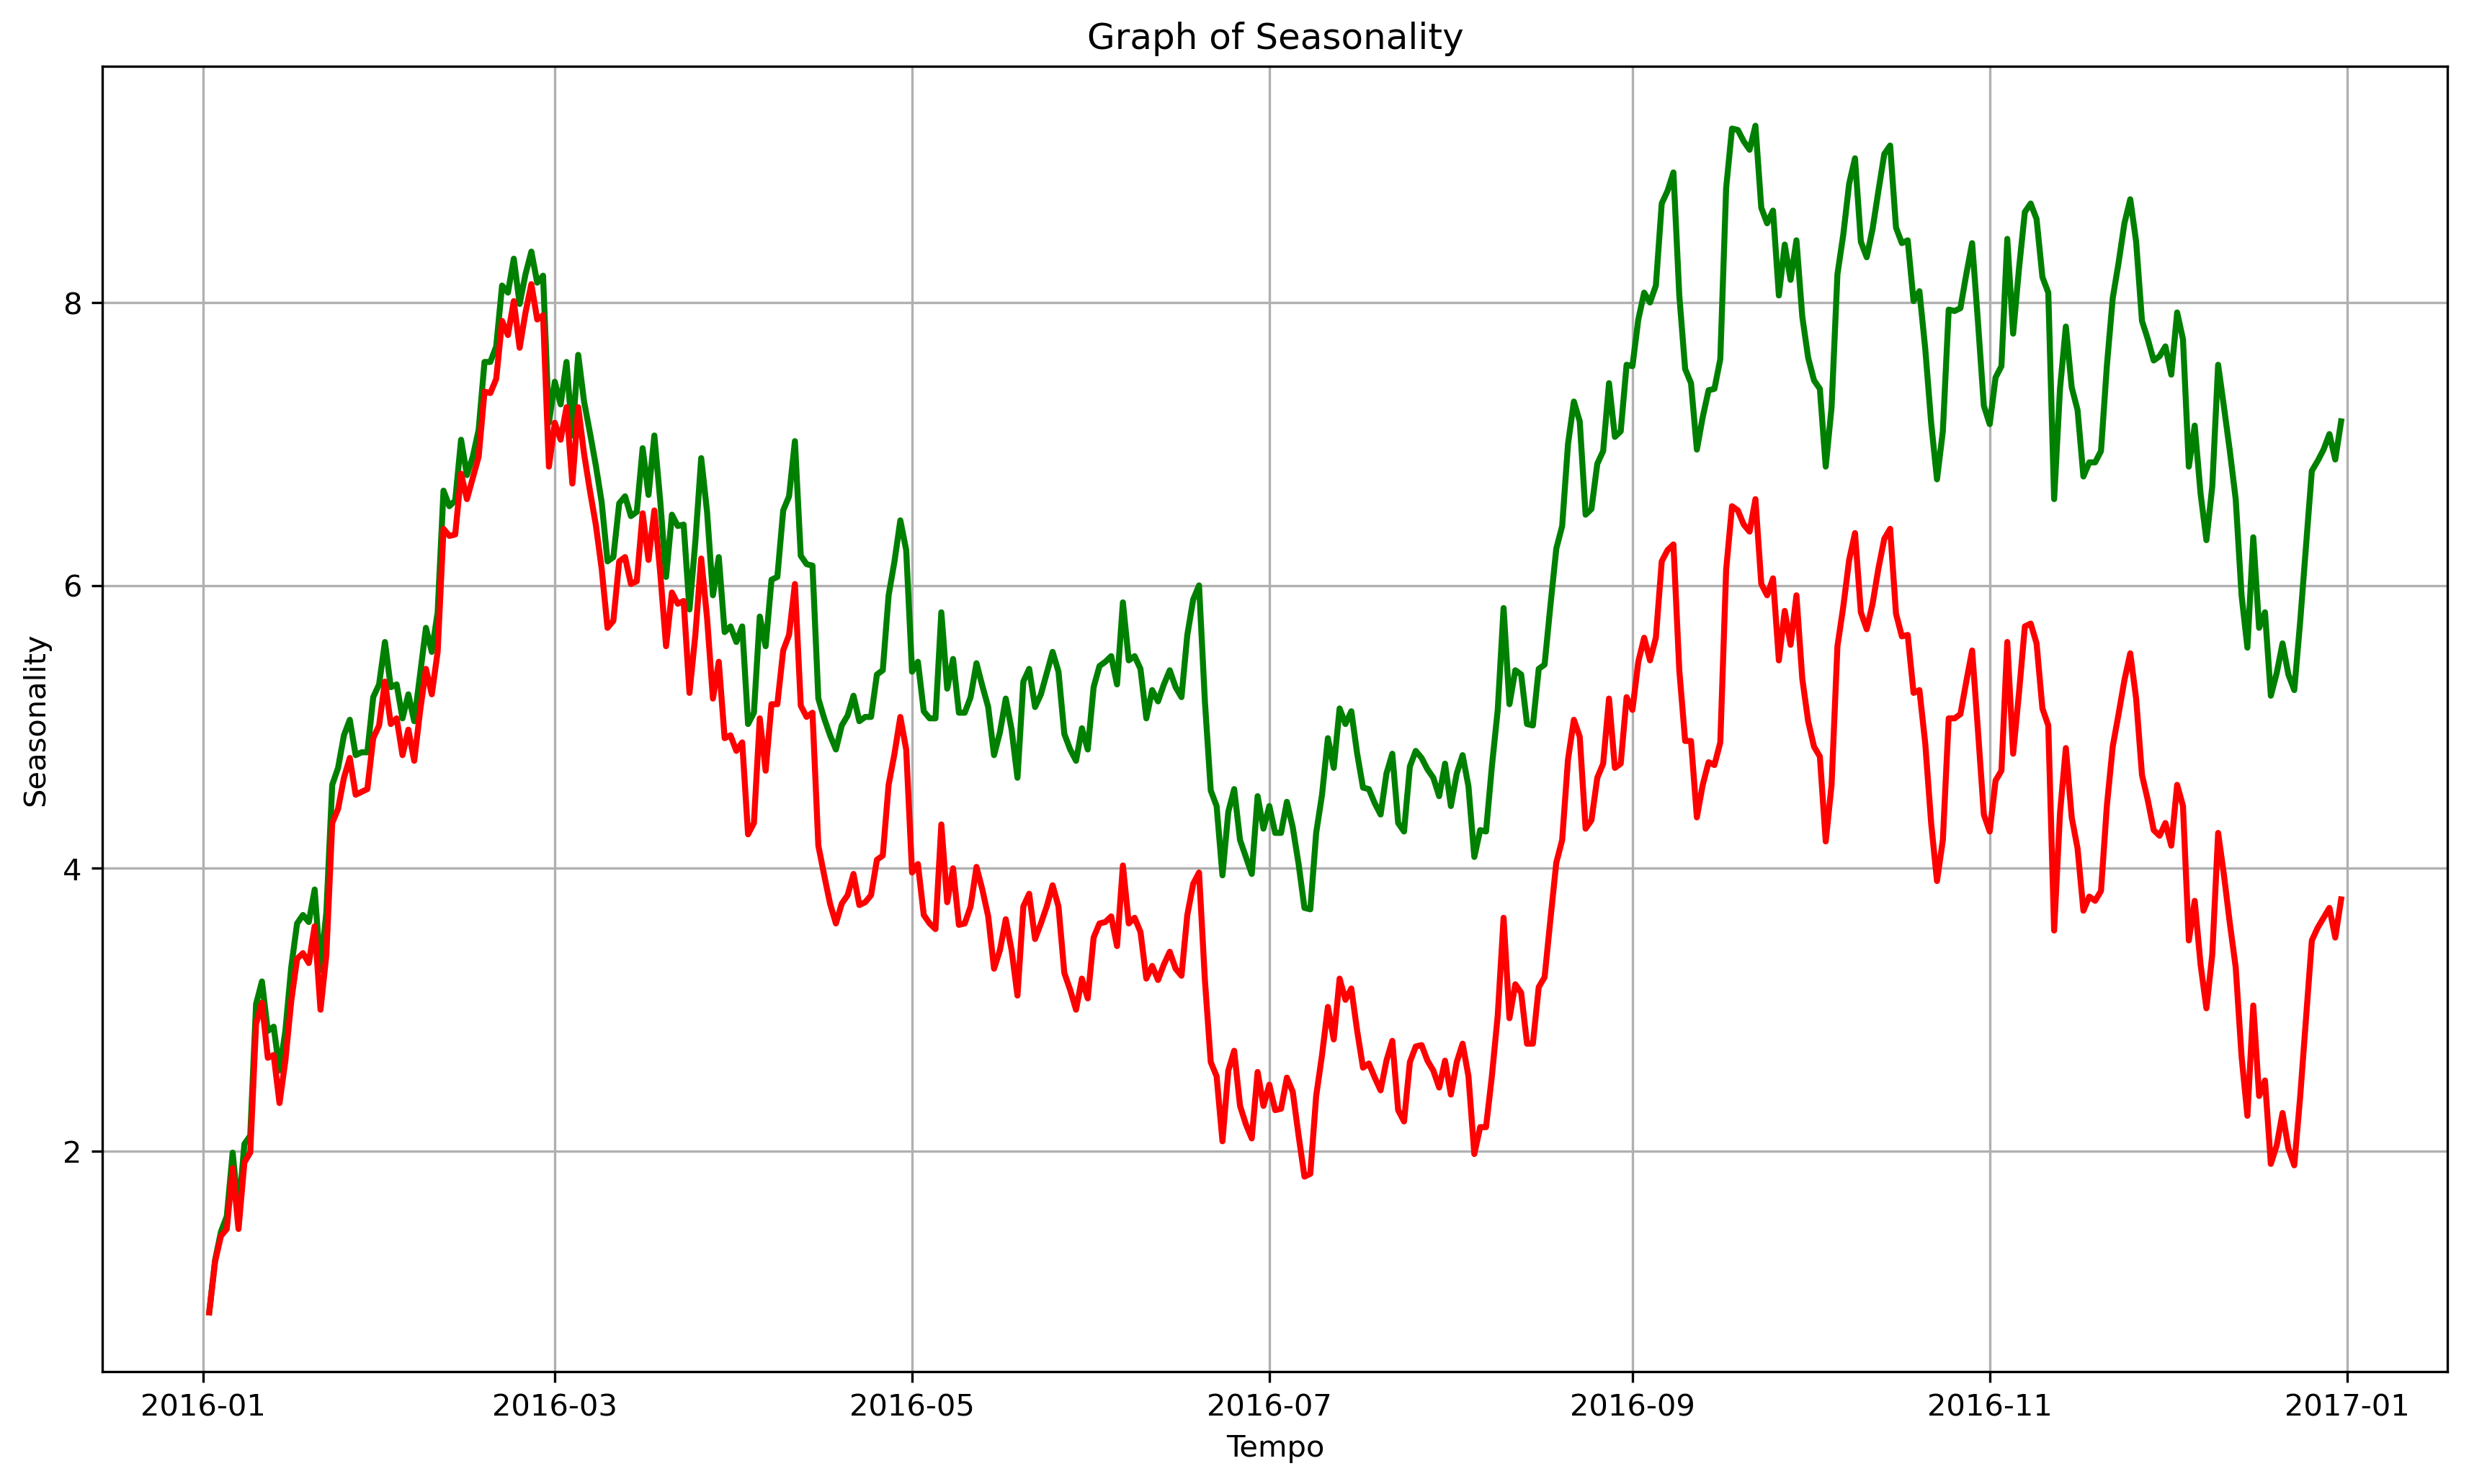

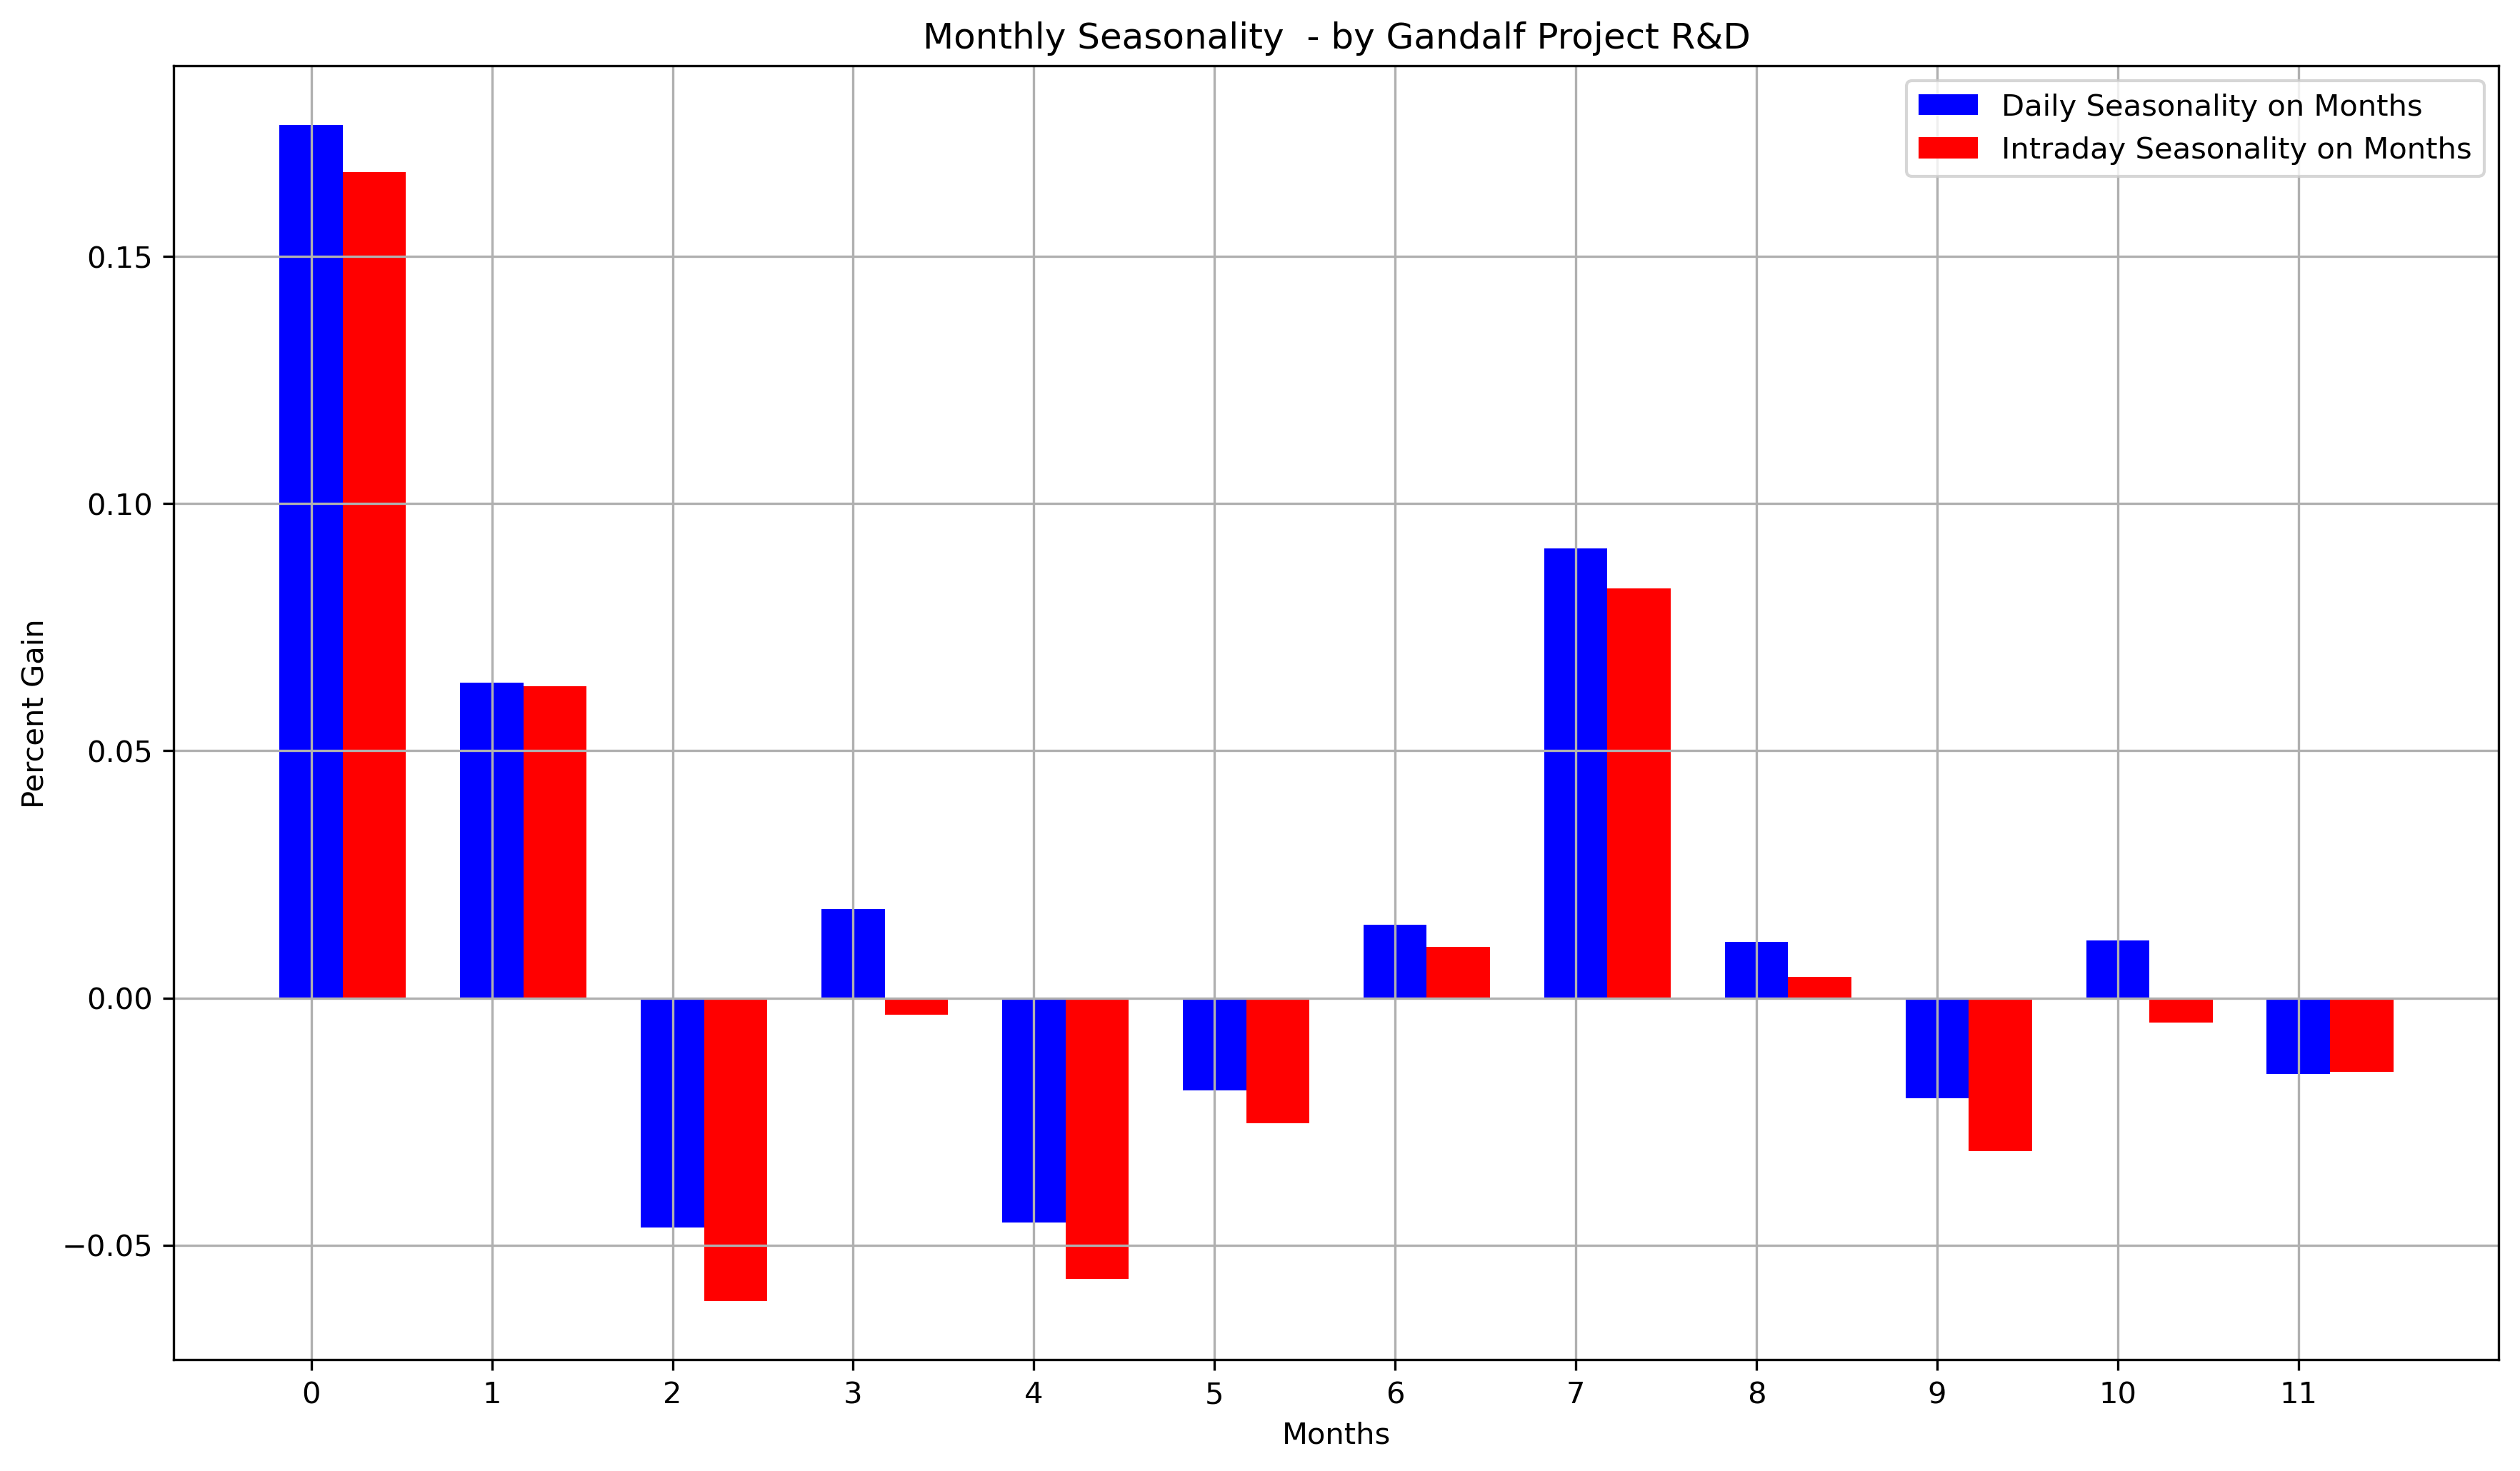

Percentuale occorrenze positive annuali: 66.67 equivalente a 8 su 12 anni
Sommatoria delta percentuali del periodo di osservazione calcolata su tutti gli anni: 26.140000000000036


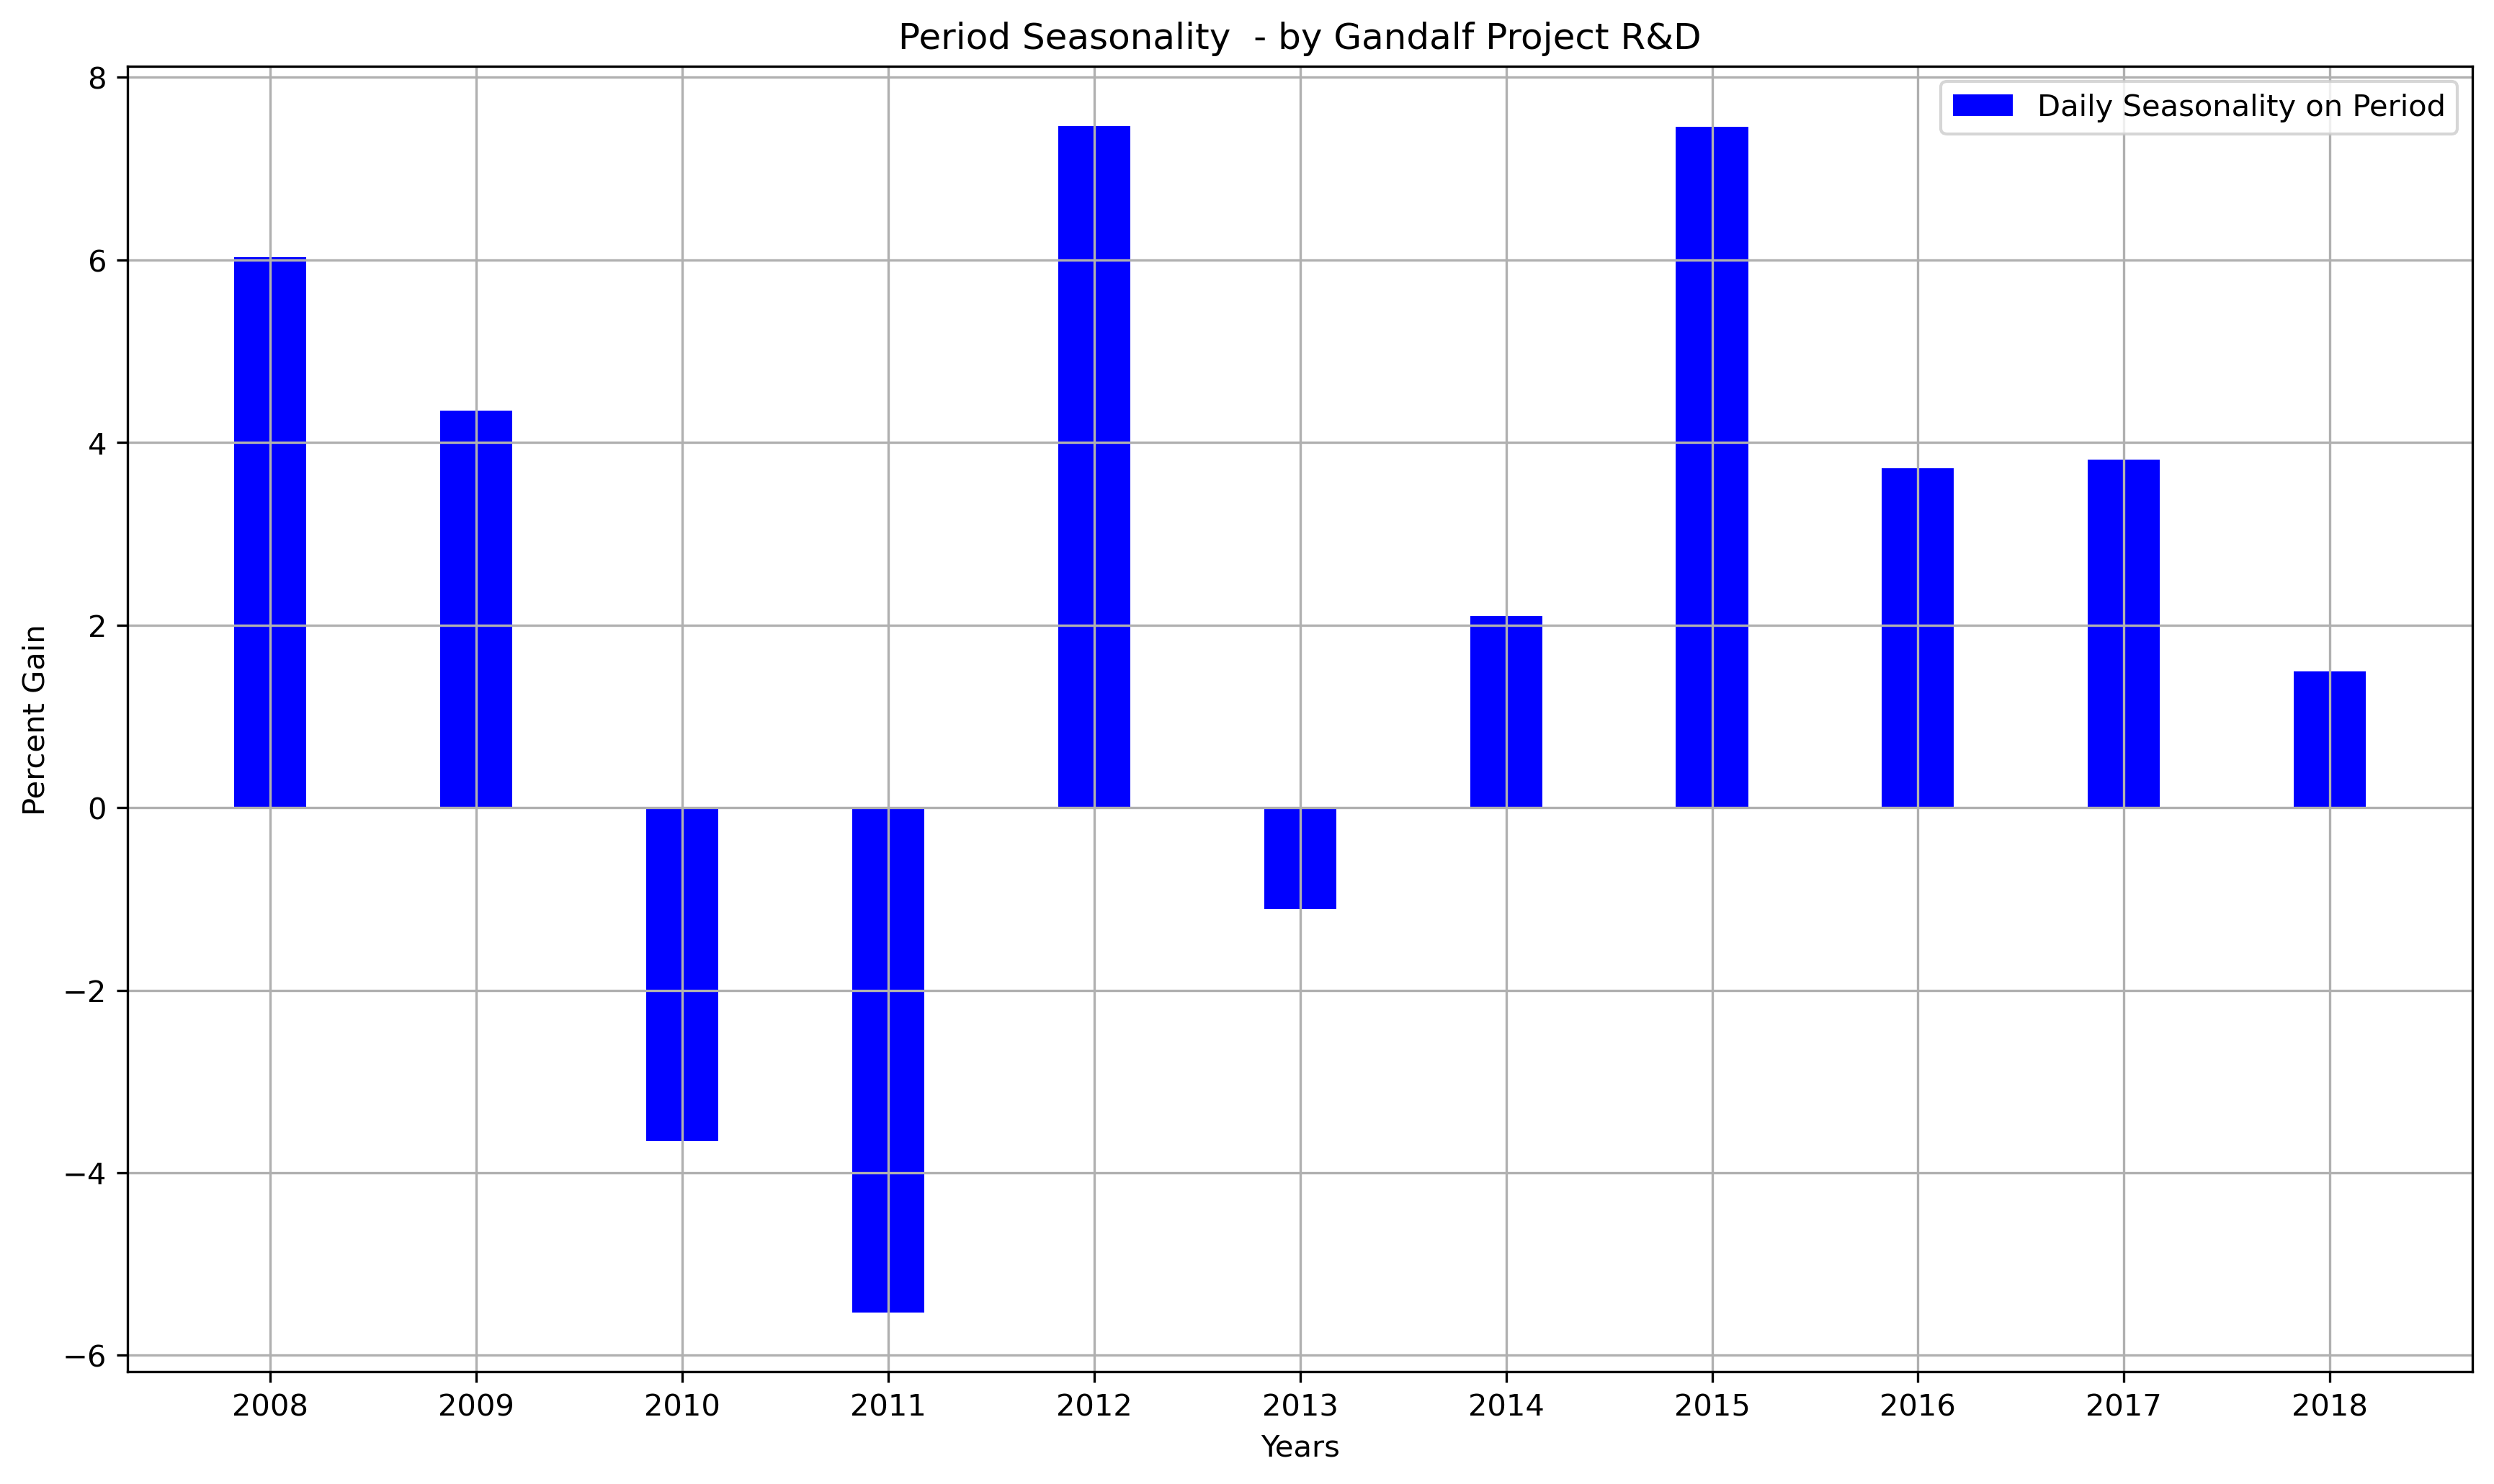

In [37]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # necessaria versione >= 1.9.0

import cufflinks as cf

# Per utilizzo con Notebooks
#init_notebook_mode(connected=True)

# Per utilizzo offline
cf.go_offline()

def PeriodStats(equity):
    if equity[-1] > equity[0]:
        return 1
    else:
        return 0
    
def PeriodDelta(equity):
    return equity[-1] - equity[0]

# INPUT ***********************************************************************************************************
filename = "@GC_1380min.txt"

# Periodo dello storico
startDate = "20070810"
endDate = "20180810"

# Periodo di osservazione su cui calcolare le statistiche
startPeriod = {"day": 1, "month": 1}
endPeriod = {"day": 1, "month": 2}
# INPUT ***********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

startPeriodParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endPeriodParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['OpenClosePercEquity'] = instrument['OpenClosePerc'].cumsum()
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)
instrument['DeltaClosePercEquity'] = instrument['DeltaClosePerc'].cumsum()
instrument['DayOfMonth'] = instrument.index.day
instrument['Month'] = instrument.index.month

instrument = instrument.loc[startDateParsed:endDateParsed]
instrument.head(10)

intraday_seasonality = []
daily_seasonality = []
daysofmonth31 = []
daysofmonth30 = []
daysofmonth29 = []
months = []

d = []

for month in range(1,13):
    months.append(month)

for day in range(1,32):
    daysofmonth31.append(day)
for day in range(1,30):
    daysofmonth29.append(day)
for day in range(1,31):
    daysofmonth30.append(day)

#print(months)
#print(daysofmonth31)
#print(daysofmonth30)
#print(daysofmonth29)
#print("")

for month in months:
    if month==2:
        for day in daysofmonth29:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==11 or month==4 or month==6 or month==9:
        for day in daysofmonth30:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})

    if month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        for day in daysofmonth31:
            daily_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['DeltaClosePerc'].mean(),2))
            intraday_seasonality.append(round(instrument[(instrument['DayOfMonth']==day) & 
                                                (instrument['Month']==month)]['OpenClosePerc'].mean(),2))
            d.append({'Month': month, 
                      'DayOfMonth': day, 
                      'DeltaClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['DeltaClosePerc'].mean(),2), 
                      'OpenClosePerc': round(instrument[(instrument['DayOfMonth']==day) & 
                                                         (instrument['Month']==month)]['OpenClosePerc'].mean(),2)})
    
#print(len(intraday_seasonality))
#print(len(daily_seasonality))

s1 = pd.DataFrame(daily_seasonality)
s1.columns = ['Daily_Seasonality']
s1['Daily_Seasonality_Equity'] = s1['Daily_Seasonality'].cumsum()

s2 = pd.DataFrame(intraday_seasonality)
s2.columns = ['Intraday_Seasonality']
s2['Intraday_Seasonality_Equity'] = s2['Intraday_Seasonality'].cumsum()

# Utilizziamo la serie di un anno bisestile
date = pd.DataFrame(pd.date_range('1/1/2016', periods=366, freq='D'))

seasonality = pd.concat([date, s1, s2], axis=1)
#seasonality = date.join(s1, how = "outer")
#seasonality = seasonality.join(s2, how = "outer")
seasonality.index = seasonality[0]
seasonality.index.names = (['Date'])
seasonality.drop(0,axis=1,inplace=True)

seasonality = seasonality.dropna() # Eliminiamo i record vuoti del 1 gennaio e del 25 dicembre
#seasonality = seasonality.fillna(0)

print("Numero di record:", len(seasonality))

seasonality.tail(10)

# ************** MODULO GRAFICO **********************************************************************************
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8), dpi=300)

plt.plot(seasonality['Daily_Seasonality_Equity'], color='green', linewidth=2)
plt.plot(seasonality['Intraday_Seasonality_Equity'], color='red', linewidth=2)

plt.xlabel("Tempo")
plt.ylabel("Seasonality")
plt.title('Graph of Seasonality')
plt.grid(True)
plt.show()

seasonality.iplot()
seasonality['Daily_Seasonality_Equity'].iplot(kind='line', color='green', width=2, showlegend=True)
seasonality['Intraday_Seasonality_Equity'].iplot(kind='line', color='red', width=2, showlegend=True)
# ************** MODULO GRAFICO **********************************************************************************

monthly = seasonality.resample('M').mean()
monthly

# ************** MODULO GRAFICO **********************************************************************************
m1 = monthly["Daily_Seasonality"]
m2 = monthly["Intraday_Seasonality"]

n_groups = 12

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                m1, 
                bar_width, 
                alpha=opacity, 
                color='blue', 
                label='Daily Seasonality on Months')

rects2 = ax.bar(index + bar_width, 
                m2, 
                bar_width, 
                alpha=opacity, 
                color='red', 
                label='Intraday Seasonality on Months')

ax.set_xlabel('Months')
ax.set_ylabel('Percent Gain')
ax.set_title('Monthly Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((index))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************

years = instrument.resample('A').mean().index.year
#print("Anni di Test:", years)

CheckOK = []
Delta = []
YearsList = []

for year in years:
    start = datetime.date(int(year), int(startPeriod['month']), int(startPeriod['day']))
    end = datetime.date(int(year), int(endPeriod['month']), int(endPeriod['day']))
    #print("Analisi dal", start, "al", end)
    prov = instrument.loc[start:end]
    #print(prov['OpenClosePercEquity'])
    if instrument.loc[start:end].empty == False:
        buffer = prov['OpenClosePercEquity']
        CheckOK.append(PeriodStats(buffer))
        Delta.append(PeriodDelta(buffer))
        YearsList.append(year)
        
#print("")
#print(CheckOK)
#print("")
#print(Delta)
#print("")
#print(YearsList)
#print("")
#print(sum(CheckOK))
Result = round(sum(CheckOK)/len(years)*100,2)

print("Percentuale occorrenze positive annuali:", Result, "equivalente a", sum(CheckOK), "su", len(years), "anni")
print("Sommatoria delta percentuali del periodo di osservazione calcolata su tutti gli anni:", sum(Delta))

# ************** MODULO GRAFICO **********************************************************************************
n_groups = len(CheckOK)

fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, 
                 Delta, 
                 bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Daily Seasonality on Period')

ax.set_xlabel('Years')
ax.set_ylabel('Percent Gain')
ax.set_title('Period Seasonality ' + ' - by Gandalf Project R&D')
ax.set_xticks(index)
ax.set_xticklabels((YearsList))
ax.legend()
ax.grid(True)
plt.show()
# ************** MODULO GRAFICO **********************************************************************************